## FFNN on Mu

In [8]:
# import absl.logging
# absl.logging.set_verbosity(absl.logging.ERROR)

import tensorflow as tf
from tensorflow import keras
#import tensorflow_addons as tfa
import pickle

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
from sklearn import metrics
from tensorflow.keras.models import load_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
%matplotlib inline
print(tf.__version__)

2.18.0


In [9]:
df= pd.read_excel("Results_Mu/STEP6_X2_features_XGB_spin_predicted.xlsx")

In [10]:
df_mu = df.drop(['material','spin_state','formation_energy','Ef_per_cell','bandgap','mag_mom_table','sitewise_axiswise_tot_mu','sitewise_mu_mag',
                 'axiswise_tot_mu','total_mag','MBT','BT','MBT_BT_combined','chemical_composition','XGB_7_BE'],axis=1)
df_mu

Mu_per_cell  min_vdw_radius  avg_a1a2_vdw_radius  \
0       2.328765             190                210.0   
1       2.325506             190                218.5   
2       2.201514             205                208.0   
3       2.057413             180                207.5   
4       2.175124             202                214.0   
..           ...             ...                  ...   
343     2.301429             205                211.5   
344     2.554534             202                211.5   
345     0.628421             180                209.0   
346     2.329022             205                218.5   
347     2.186019             190                200.5   

     delta_a12x18_avg_vdw_radius  delta_a12x914_avg_vdw_radius  \
0                           20.0                           4.0   
1                           28.5                          12.5   
2                            2.0                           2.0   
3                           27.5                          17.5   
4                            8.0                           8.0   
..                           ...                           ...   
343                          5.5                           5.5   
344                          5.5                           5.5   
345                         19.0                          29.0   
346                         12.5                          12.5   
347                          5.5                          10.5   

     delta_a12b14_avg_vdw_radius  delta_a12b58_avg_vdw_radius  \
0                            3.0                          7.0   
1                           12.5                          1.5   
2                            2.0                          9.0   
3                            1.5                          9.5   
4                           12.0                          8.0   
..                           ...                          ...   
343                          5.5                          5.5   
344                          9.5                          5.5   
345                          3.0                          2.0   
346                         12.5                         11.5   
347                         16.5                          5.5   

     delta_a1a2_vdw_radius  avg_a12b14_vdw_radius  avg_a12b58_vdw_radius  ...  \
0                     10.0             208.000000             214.666667  ...   
1                     27.0             210.166667             217.500000  ...   
2                      6.0             206.666667             214.000000  ...   
3                      5.0             206.500000             213.833333  ...   
4                     18.0             206.000000             208.666667  ...   
..                     ...                    ...                    ...  ...   
343                   13.0             207.833333             207.833333  ...   
344                   13.0             205.166667             207.833333  ...   
345                    8.0             207.000000             207.666667  ...   
346                   27.0             210.166667             210.833333  ...   
347                    9.0             211.500000             204.166667  ...   

     avg_mendeleev_number  std_mendeleev_number  \
0               93.083333             19.648827   
1               92.958333             19.445392   
2               95.791667             10.999921   
3               94.541667             11.320995   
4               94.791667             14.367148   
..                    ...                   ...   
343             97.041667             10.171362   
344             94.958333             13.788519   
345             95.625000             11.679086   
346             94.458333             19.566083   
347             95.500000             10.958254   

     delta_b18x114_avg_mendeleev_number  delta_a12b14_avg_mendeleev_number  \
0                              7.928571                               64.0   
1   

In [57]:
df_mu_fm = df_mu[df['XGB_7_BE'] == 'FM']
df_mu_fm

Mu_per_cell  min_vdw_radius  avg_a1a2_vdw_radius  \
0       2.328765             190                210.0   
1       2.325506             190                218.5   
2       2.201514             205                208.0   
4       2.175124             202                214.0   
5       4.605014             205                205.0   
..           ...             ...                  ...   
342     2.195138             190                208.0   
343     2.301429             205                211.5   
344     2.554534             202                211.5   
346     2.329022             205                218.5   
347     2.186019             190                200.5   

     delta_a12x18_avg_vdw_radius  delta_a12x914_avg_vdw_radius  \
0                           20.0                           4.0   
1                           28.5                          12.5   
2                            2.0                           2.0   
4                            8.0                           8.0   
5                            1.0                           1.0   
..                           ...                           ...   
342                          2.0                          18.0   
343                          5.5                           5.5   
344                          5.5                           5.5   
346                         12.5                          12.5   
347                          5.5                          10.5   

     delta_a12b14_avg_vdw_radius  delta_a12b58_avg_vdw_radius  \
0                            3.0                          7.0   
1                           12.5                          1.5   
2                            2.0                          9.0   
4                           12.0                          8.0   
5                            1.0                          1.0   
..                           ...                          ...   
342                          2.0                          1.0   
343                          5.5                          5.5   
344                          9.5                          5.5   
346                         12.5                         11.5   
347                         16.5                          5.5   

     delta_a1a2_vdw_radius  avg_a12b14_vdw_radius  avg_a12b58_vdw_radius  ...  \
0                     10.0             208.000000             214.666667  ...   
1                     27.0             210.166667             217.500000  ...   
2                      6.0             206.666667             214.000000  ...   
4                     18.0             206.000000             208.666667  ...   
5                      0.0             205.666667             205.666667  ...   
..                     ...                    ...                    ...  ...   
342                    6.0             206.666667             207.333333  ...   
343                   13.0             207.833333             207.833333  ...   
344                   13.0             205.166667             207.833333  ...   
346                   27.0             210.166667             210.833333  ...   
347                    9.0             211.500000             204.166667  ...   

     avg_mendeleev_number  std_mendeleev_number  \
0               93.083333             19.648827   
1               92.958333             19.445392   
2               95.791667             10.999921   
4               94.791667             14.367148   
5               96.083333             12.691587   
..                    ...                   ...   
342             96.708333             10.580954   
343             97.041667             10.171362   
344             94.958333             13.788519   
346             94.458333             19.566083   
347             95.500000             10.958254   

     delta_b18x114_avg_mendeleev_number  delta_a12b14_avg_mendeleev_number  \
0                              7.928571                               64.0   
1   

In [2]:
## Using Optuna to tune the hyperparameters in FFNN

In [4]:
# !pip install optuna

In [94]:
import tensorflow as tf
import optuna
import numpy as np
from tensorflow.keras import layers, regularizers
from sklearn.metrics import r2_score
import random

train_val_dataset = df_mu_fm.sample(frac = 0.8, random_state = 42)
train_dataset = train_val_dataset.sample(frac = 0.75, random_state = 42)
val_dataset = train_val_dataset.drop(train_dataset.index)
test_dataset = df_mu_fm.drop(train_val_dataset.index)

train_data = np.copy(train_dataset)
val_data = np.copy(val_dataset)
test_data = np.copy(test_dataset)

train_data = pd.DataFrame(train_data)
val_data = pd.DataFrame(val_data)
test_data = pd.DataFrame(test_data)

X_train = train_data.drop([0],axis='columns')
X_val = val_data.drop([0],axis='columns')
X_test = test_data.drop([0],axis='columns')

y_train = train_data[0]
y_val = val_data[0]
y_test = test_data[0]

def objective(trial):

    hidden_layer_1  = trial.suggest_categorical('hidden_1', [100, 64])
    hidden_layer_2 = trial.suggest_categorical('hidden_2', [128, 50, 32])
    hidden_layer_3 = trial.suggest_categorical('hidden_3', [64, 20, 16])
    dropout_rate = trial.suggest_categorical('dropout_rate', [0.0, 0.1, 0.2])
    reg_type = trial.suggest_categorical('reg_type', ['None', 'L1', 'L2'])
    reg_strength = trial.suggest_categorical('reg_strength', [1e-5, 1e-4, 1e-3, 1e-2]) if reg_type != 'None' else 0.0
    learning_rate = trial.suggest_categorical('learning_rate', [1e-4, 1e-3, 5e-3, 1e-2])
    activation_type = trial.suggest_categorical('activation', ['relu', 'elu', 'selu'])

    SEED = 42
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)
    
    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(np.array(X_train))
    
    if reg_type == 'L1':
        reg = regularizers.l1(reg_strength)
    elif reg_type == 'L2':
        reg = regularizers.l2(reg_strength)
    else:
        reg = None  # No regularization  

    model = tf.keras.Sequential([normalizer])

    model.add(layers.Dense(hidden_layer_1, activation=activation_type, kernel_regularizer=reg))
    model.add(layers.Dropout(dropout_rate, seed=SEED))
    model.add(layers.Dense(hidden_layer_2, activation=activation_type, kernel_regularizer=reg))
    model.add(layers.Dropout(dropout_rate, seed=SEED))
    model.add(layers.Dense(hidden_layer_3, activation=activation_type, kernel_regularizer=reg))
    model.add(layers.Dropout(dropout_rate, seed=SEED))
    model.add(layers.Dense(1))  

    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mean_absolute_error')

    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0, shuffle=False)

    # Return best validation loss
    # return min(history.history['val_loss'])

    # Return best R2 scores
    r2_train = r2_score(y_train, model.predict(X_train).flatten())
    r2_val = r2_score(y_val, model.predict(X_val).flatten())
    r2_test = r2_score(y_test, model.predict(X_test).flatten())
    return r2_train,r2_val,r2_test

# Run Optuna optimization
#study = optuna.create_study(direction='minimize') # for minimizing loss
study = optuna.create_study(directions=['maximize','maximize','maximize']) # for maximizing R2
study.optimize(objective, n_trials=300)

[I 2025-03-10 21:34:51,042] A new study created in memory with name: no-name-e6013e48-8538-4a61-96a3-732ce2639835


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-10 21:35:59,627] Trial 0 finished with values: [0.983073966384483, 0.6624861116339971, 0.9093274306091855] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-10 21:36:55,348] Trial 1 finished with values: [0.9085658306904065, 0.6923222707892707, 0.9328310817725125] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-10 21:37:49,895] Trial 2 finished with values: [0.9778042048005359, 0.6302652831604252, 0.785897350225116] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


[I 2025-03-10 21:38:48,674] Trial 3 finished with values: [0.9204795651293687, 0.634570173240413, 0.8992779356546201] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-10 21:39:45,166] Trial 4 finished with values: [0.9783842539618766, 0.6330616314561506, 0.7944031271360871] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-10 21:40:42,258] Trial 5 finished with values: [0.9046564877346154, 0.6981362847105251, 0.9544751209143626] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 21:41:39,791] Trial 6 finished with values: [0.9854330000425991, 0.6950567938175315, 0.8734322717445383] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-10 21:42:35,693] Trial 7 finished with values: [0.8577873522239752, 0.6693439547535703, 0.8861212890212341] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 21:43:34,235] Trial 8 finished with values: [0.9799033624919137, 0.7145767736024428, 0.9528057060258303] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-10 21:44:27,165] Trial 9 finished with values: [0.9891759253533736, 0.692435056812939, 0.867238902807452] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-10 21:45:21,334] Trial 10 finished with values: [0.986183938518675, 0.6789413606691181, 0.9253186913444221] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-03-10 21:46:24,272] Trial 11 finished with values: [0.9747875951640758, 0.6927142120452986, 0.9054248979008785] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2025-03-10 21:47:18,909] Trial 12 finished with values: [0.9717950199334685, 0.5737682053483368, 0.8459500388208201] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 21:48:13,413] Trial 13 finished with values: [0.9337526060783358, 0.6964443594095888, 0.946893095376049] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


[I 2025-03-10 21:49:05,512] Trial 14 finished with values: [0.9798595837020821, 0.6857823035522411, 0.9033065652181482] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 21:49:58,260] Trial 15 finished with values: [0.884142026855512, 0.6616187425222185, 0.910476891333832] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 21:50:52,127] Trial 16 finished with values: [0.9646996069792326, 0.6492510205479155, 0.9280551772610374] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 21:51:44,596] Trial 17 finished with values: [0.984986894219962, 0.7252563738484108, 0.9477817556380637] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 21:52:38,256] Trial 18 finished with values: [0.9353941573678474, 0.7019553883155158, 0.9423564124888804] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[I 2025-03-10 21:53:32,091] Trial 19 finished with values: [0.9526343896168725, 0.6522657897561583, 0.8924526767163613] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-10 21:54:25,979] Trial 20 finished with values: [0.9150018077590268, 0.6252095678465153, 0.8243752836383773] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-10 21:55:17,359] Trial 21 finished with values: [0.608995532104708, 0.33928525258666187, 0.545591828064457] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 21:56:10,410] Trial 22 finished with values: [0.9898209370114184, 0.6484242908580042, 0.88609458636102] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-10 21:57:01,764] Trial 23 finished with values: [0.9865204826702055, 0.6878063029011197, 0.8802461811677607] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 21:57:55,607] Trial 24 finished with values: [0.9767483616485826, 0.6972124617220374, 0.9456711636814217] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 21:58:48,800] Trial 25 finished with values: [0.9715119745171432, 0.6823481111612117, 0.9200677982502652] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 21:59:43,922] Trial 26 finished with values: [0.9869622234859579, 0.652773197839892, 0.9018172894514751] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-10 22:00:36,553] Trial 27 finished with values: [0.9469320233635522, 0.6541544560015322, 0.853202227631332] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-10 22:01:27,985] Trial 28 finished with values: [0.9879240162712788, 0.6099996975022968, 0.8664101471668699] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-10 22:02:20,040] Trial 29 finished with values: [0.861036549289847, 0.626103630843536, 0.8304624768246035] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-03-10 22:03:12,656] Trial 30 finished with values: [0.9673977379214345, 0.6885117528214342, 0.9318323112471404] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-10 22:04:04,252] Trial 31 finished with values: [0.9402040935076621, 0.6523186473234184, 0.8953446427326066] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-10 22:04:55,449] Trial 32 finished with values: [0.9770197870816395, 0.6988705960447015, 0.9331229479748641] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:05:46,693] Trial 33 finished with values: [0.966375503408506, 0.6367180489814435, 0.8712987377911012] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:06:37,289] Trial 34 finished with values: [0.9200563035652035, 0.7054858615709505, 0.9735902206590994] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:07:28,862] Trial 35 finished with values: [0.928239783974134, 0.6923887501715003, 0.9284098936750124] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[I 2025-03-10 22:08:21,700] Trial 36 finished with values: [0.799802921054687, 0.4725889931316446, 0.6560167647788202] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-10 22:09:13,596] Trial 37 finished with values: [0.8869976351187061, 0.5545265862349769, 0.7994620162528568] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-10 22:10:05,879] Trial 38 finished with values: [0.6071242760961966, 0.3342720941312278, 0.4811847970481483] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-10 22:10:59,468] Trial 39 finished with values: [0.9732691532362885, 0.6699416493377404, 0.8916876570871779] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-10 22:11:51,341] Trial 40 finished with values: [0.8964928559886269, 0.6915568584843275, 0.9425421245953252] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-10 22:12:44,502] Trial 41 finished with values: [0.9495674778965909, 0.6591597697834618, 0.9013422951276151] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:13:36,219] Trial 42 finished with values: [0.8855829936057178, 0.6905498906597796, 0.9185104984701917] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-10 22:14:27,689] Trial 43 finished with values: [0.9872323882383928, 0.6914353430493017, 0.9332458659020211] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


[I 2025-03-10 22:15:18,293] Trial 44 finished with values: [0.8973069618746506, 0.6888909150745797, 0.8972260445127311] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:16:09,568] Trial 45 finished with values: [0.9812787136880579, 0.6604674190098069, 0.9362005995063966] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[I 2025-03-10 22:17:00,902] Trial 46 finished with values: [0.927482119037881, 0.7156353157649769, 0.9159834271377584] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-10 22:17:53,267] Trial 47 finished with values: [0.9042255031136546, 0.682796031130376, 0.8921912305723382] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-10 22:18:44,723] Trial 48 finished with values: [0.9580749849130268, 0.5919521688836764, 0.7899862432453526] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:19:36,908] Trial 49 finished with values: [0.9220369680306477, 0.6386240197292664, 0.8585887429606821] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-03-10 22:20:29,074] Trial 50 finished with values: [0.9891469458367823, 0.6247654602662829, 0.8316232639436715] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-10 22:21:20,213] Trial 51 finished with values: [0.9507872724960256, 0.6539770027181924, 0.8985547141722027] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:22:11,564] Trial 52 finished with values: [0.9811489446115581, 0.6807977182798617, 0.9189816728592302] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-10 22:23:05,769] Trial 53 finished with values: [0.9575640034956774, 0.6672477270383381, 0.9162476694297618] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-10 22:23:56,361] Trial 54 finished with values: [0.9872323882383928, 0.6914353430493017, 0.9332458659020211] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-10 22:24:50,467] Trial 55 finished with values: [0.8585513372257895, 0.6682298116551888, 0.8942332245982652] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-10 22:25:45,444] Trial 56 finished with values: [0.9883252126188292, 0.7002770640973515, 0.8906740838030259] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:26:39,655] Trial 57 finished with values: [0.9710719118689858, 0.6772104381098221, 0.8903418109635419] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[I 2025-03-10 22:27:34,435] Trial 58 finished with values: [0.9204795651293687, 0.634570173240413, 0.8992779356546201] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-10 22:28:30,022] Trial 59 finished with values: [0.7897658096451945, 0.5138453762656175, 0.6906606211298735] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2025-03-10 22:29:22,385] Trial 60 finished with values: [0.9580749849130268, 0.5919521688836764, 0.7899862432453526] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-10 22:30:13,084] Trial 61 finished with values: [0.9880783572983474, 0.6805822585621648, 0.8842921621786963] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-10 22:31:06,196] Trial 62 finished with values: [0.9205592232061047, 0.7063369842630505, 0.95044859677241] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-10 22:31:58,267] Trial 63 finished with values: [0.8859971110215675, 0.6542986383364373, 0.8718915606024783] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-10 22:32:50,925] Trial 64 finished with values: [0.9399024628367767, 0.6978356150519001, 0.9469123346818067] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-10 22:33:41,604] Trial 65 finished with values: [0.9853552283121778, 0.6815280937334736, 0.8912238959213232] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:34:33,963] Trial 66 finished with values: [0.9880479808860428, 0.6672844074749653, 0.8964035369763463] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-10 22:35:26,545] Trial 67 finished with values: [0.9668143210026027, 0.6741745433507685, 0.8417646923626286] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


[I 2025-03-10 22:36:26,312] Trial 68 finished with values: [0.9158910015776809, 0.6982524884277612, 0.9423640653869346] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-10 22:37:41,760] Trial 69 finished with values: [0.9234154484463439, 0.6493212186478259, 0.8543312881773232] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:38:27,012] Trial 70 finished with values: [0.7894580546297827, 0.5303206316318261, 0.6826107883380461] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:39:11,234] Trial 71 finished with values: [0.9029816925232257, 0.7106598042383762, 0.9348183572198295] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:39:57,157] Trial 72 finished with values: [0.831288212979907, 0.5775213769478473, 0.7683853264415846] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:40:42,315] Trial 73 finished with values: [0.9863659315509108, 0.7062847854711443, 0.9365095781595356] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-10 22:41:28,731] Trial 74 finished with values: [0.977295462382661, 0.6522734076847343, 0.912686518594424] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-10 22:42:13,840] Trial 75 finished with values: [0.9891469458367823, 0.6247654602662829, 0.8316232639436715] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:42:59,660] Trial 76 finished with values: [0.9520440037348, 0.7169026905086557, 0.9074671767309582] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:43:44,411] Trial 77 finished with values: [0.9873726920419281, 0.660406452605478, 0.948864079992785] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:44:28,693] Trial 78 finished with values: [0.988242452976584, 0.6997109387229552, 0.9513575927984891] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-03-10 22:45:13,466] Trial 79 finished with values: [0.9151669314115791, 0.6836691534596415, 0.9514272592315314] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:45:56,848] Trial 80 finished with values: [0.9871137804187536, 0.6625757545334133, 0.9503270410548231] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:46:41,893] Trial 81 finished with values: [0.9820297951442511, 0.6549635364917037, 0.9421327037589742] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:47:25,856] Trial 82 finished with values: [0.9440975741554481, 0.716406690883935, 0.9366920470625124] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:48:10,055] Trial 83 finished with values: [0.9653840626870065, 0.6471627613633772, 0.8948024096467386] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


[I 2025-03-10 22:48:54,351] Trial 84 finished with values: [0.941439524415308, 0.6385810986883103, 0.9030976254002275] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:49:38,602] Trial 85 finished with values: [0.9876539796845653, 0.6912161896697562, 0.799523675286988] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:50:23,246] Trial 86 finished with values: [0.9828119951012178, 0.6466931303013224, 0.8599296590476084] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-10 22:51:07,440] Trial 87 finished with values: [0.97850612750372, 0.6958617070750532, 0.9268959226924146] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:51:51,996] Trial 88 finished with values: [0.9129673873065025, 0.7055188157940474, 0.9629544613114782] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:52:36,765] Trial 89 finished with values: [0.9859856700469393, 0.6833178293690716, 0.9123029962916749] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-03-10 22:53:21,518] Trial 90 finished with values: [0.9753121034119441, 0.6777361782895905, 0.9506134949170413] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:54:06,103] Trial 91 finished with values: [0.9813025085169196, 0.6940835871216902, 0.951968085430903] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


[I 2025-03-10 22:54:50,804] Trial 92 finished with values: [0.9688536755188165, 0.6593661880873797, 0.8760492963420319] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:55:35,730] Trial 93 finished with values: [0.9744915645244947, 0.6971928216087411, 0.9242624546130279] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-10 22:56:19,517] Trial 94 finished with values: [0.9894985315799799, 0.6371063906634719, 0.8814121571893648] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-10 22:57:03,169] Trial 95 finished with values: [0.9828579819029595, 0.6922201542427626, 0.9056631856161298] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:57:47,376] Trial 96 finished with values: [0.9863675502268924, 0.6998720981144706, 0.911101454355261] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 22:58:32,376] Trial 97 finished with values: [0.9392185083928888, 0.6364991098584678, 0.9036972928640833] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


[I 2025-03-10 22:59:15,991] Trial 98 finished with values: [0.9645476216753068, 0.6706416765163867, 0.9021614340917479] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:00:00,445] Trial 99 finished with values: [0.8848269564044463, 0.702697552207446, 0.9209962644269493] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:00:45,439] Trial 100 finished with values: [0.9593793089879376, 0.6972049757787848, 0.9361831945277439] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:01:32,447] Trial 101 finished with values: [0.9141804042806114, 0.7206687956884293, 0.9470480384977957] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[I 2025-03-10 23:02:16,645] Trial 102 finished with values: [0.9870828409662883, 0.6624360476944586, 0.8987539371755707] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:03:01,129] Trial 103 finished with values: [0.9883811849023629, 0.6828971675014384, 0.9348348835681408] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:03:44,614] Trial 104 finished with values: [0.9755226756505472, 0.6820485392618036, 0.8893152143009181] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:04:30,229] Trial 105 finished with values: [0.9451320484017154, 0.6778531255446711, 0.8867596190043067] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:05:14,648] Trial 106 finished with values: [0.9747168940151172, 0.6853259306279817, 0.8913030137307504] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:05:59,227] Trial 107 finished with values: [0.9865723432941452, 0.6786330318777303, 0.8851123190735879] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-10 23:06:44,151] Trial 108 finished with values: [0.8701965575991288, 0.6054420171932298, 0.7844168668174666] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:07:29,370] Trial 109 finished with values: [0.9778232069903067, 0.6814251025471856, 0.9435554818600418] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[I 2025-03-10 23:08:14,685] Trial 110 finished with values: [0.9144405063143836, 0.6809410650689441, 0.9114086466028285] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


[I 2025-03-10 23:08:59,375] Trial 111 finished with values: [0.9886818213868018, 0.6742327566704001, 0.8877538502058747] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-10 23:09:44,187] Trial 112 finished with values: [0.9766311516161152, 0.6705148403069537, 0.9296349429225412] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:10:28,893] Trial 113 finished with values: [0.9399024628367767, 0.6978356150519001, 0.9469123346818067] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:11:13,545] Trial 114 finished with values: [0.9604829925467709, 0.6709684296707052, 0.9034284573783494] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:11:57,646] Trial 115 finished with values: [0.9783214325299885, 0.6919433263817363, 0.9542722039142817] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:12:42,045] Trial 116 finished with values: [0.9545349344972447, 0.6619183697439375, 0.8949412296361084] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-10 23:13:26,158] Trial 117 finished with values: [0.9809565877677038, 0.6293448286206274, 0.7515436251685713] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:14:09,931] Trial 118 finished with values: [0.9827086585904661, 0.7203110551466286, 0.9405489109355348] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:14:53,923] Trial 119 finished with values: [0.9770197870816395, 0.6988705960447015, 0.9331229479748641] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


[I 2025-03-10 23:15:39,144] Trial 120 finished with values: [0.8577873522239752, 0.6693439547535703, 0.8861212890212341] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:16:23,117] Trial 121 finished with values: [0.984986894219962, 0.7252563738484108, 0.9477817556380637] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:17:06,927] Trial 122 finished with values: [0.9860735184145952, 0.6710265932217286, 0.9043876733936522] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-10 23:17:52,253] Trial 123 finished with values: [0.9377170271411458, 0.7068094133749333, 0.9416945552268368] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:18:35,820] Trial 124 finished with values: [0.9638949154897318, 0.7030108916596762, 0.9374049642814505] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


[I 2025-03-10 23:19:19,725] Trial 125 finished with values: [0.9915351400642562, 0.6616990473890703, 0.9177856181354445] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:20:03,260] Trial 126 finished with values: [0.9752710039784998, 0.5713847149979325, 0.8785766784650582] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:20:47,132] Trial 127 finished with values: [0.9344944738532367, 0.714271004670194, 0.9572589368702319] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:21:31,323] Trial 128 finished with values: [0.9094510245999676, 0.7131302247730511, 0.9605601061989923] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-10 23:22:15,131] Trial 129 finished with values: [0.9882927852379803, 0.690277117907153, 0.9375619104980057] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:22:59,069] Trial 130 finished with values: [0.9892356383979807, 0.6763475624491103, 0.948357020318958] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:23:42,602] Trial 131 finished with values: [0.9897292654872392, 0.6764626335283754, 0.945810310636282] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[I 2025-03-10 23:24:27,841] Trial 132 finished with values: [0.9907017353329722, 0.6147119708737694, 0.8685432457478511] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-10 23:25:12,113] Trial 133 finished with values: [0.9875969845270768, 0.6433966219402529, 0.8646385942907596] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


[I 2025-03-10 23:25:57,062] Trial 134 finished with values: [0.981691579776934, 0.6809592163750168, 0.9350628859766571] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-10 23:26:41,566] Trial 135 finished with values: [0.9267091297359742, 0.6722592008537627, 0.9158915085097554] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-10 23:27:26,506] Trial 136 finished with values: [0.9399024628367767, 0.6978356150519001, 0.9469123346818067] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-10 23:28:11,833] Trial 137 finished with values: [0.9040631826160349, 0.6933274107716945, 0.9374519132077606] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-10 23:28:56,523] Trial 138 finished with values: [0.9841107421421955, 0.6768839868820336, 0.8880507294629835] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-10 23:29:40,848] Trial 139 finished with values: [0.9076196675122452, 0.6417772640034183, 0.8281014436301727] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-10 23:30:25,818] Trial 140 finished with values: [0.911951539867775, 0.6826887831475527, 0.9032571687910167] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-03-10 23:31:09,880] Trial 141 finished with values: [0.9739443296827093, 0.6624884017167789, 0.8960155571319763] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:31:54,549] Trial 142 finished with values: [0.9865204826702055, 0.6878063029011197, 0.8802461811677607] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:32:39,636] Trial 143 finished with values: [0.9724750936228463, 0.6793787095425292, 0.9011314587935613] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-10 23:33:25,333] Trial 144 finished with values: [0.9204519175374698, 0.6226669091268839, 0.7692803560999634] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


[I 2025-03-10 23:34:09,503] Trial 145 finished with values: [0.9886174840831555, 0.6105433137098165, 0.8657394789377835] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:34:54,709] Trial 146 finished with values: [0.9129673873065025, 0.7055188157940474, 0.9629544613114782] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


[I 2025-03-10 23:35:39,822] Trial 147 finished with values: [0.9788486366273832, 0.704539206274927, 0.9323097130995567] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-10 23:36:23,990] Trial 148 finished with values: [0.9904457966912102, 0.6562808927577142, 0.850628182539057] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:37:09,726] Trial 149 finished with values: [0.9723108581903199, 0.6683211959486213, 0.9078200654248332] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:37:54,032] Trial 150 finished with values: [0.9819302610995649, 0.6613143775758665, 0.8619431038992983] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:38:38,513] Trial 151 finished with values: [0.9883252126188292, 0.7002770640973515, 0.8906740838030259] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:39:23,505] Trial 152 finished with values: [0.987172673573063, 0.678267356274852, 0.9359613967889834] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:40:08,211] Trial 153 finished with values: [0.9915351400642562, 0.6616990473890703, 0.9177856181354445] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:40:52,849] Trial 154 finished with values: [0.9853080350408661, 0.6676561944037087, 0.903350943635671] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:41:38,317] Trial 155 finished with values: [0.9870828409662883, 0.6624360476944586, 0.8987539371755707] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-10 23:42:23,501] Trial 156 finished with values: [0.9353941573678474, 0.7019553883155158, 0.9423564124888804] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-10 23:43:09,442] Trial 157 finished with values: [0.9760701497395516, 0.621181636437693, 0.9081919549842942] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:43:53,794] Trial 158 finished with values: [0.9882930659025214, 0.670221842149801, 0.9348554964906799] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2025-03-10 23:44:39,906] Trial 159 finished with values: [0.8770618015532529, 0.6752645000012205, 0.9165274224990784] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-10 23:45:29,721] Trial 160 finished with values: [0.9191160020071357, 0.7080933963673457, 0.9441059610599984] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:46:16,103] Trial 161 finished with values: [0.9854823910599201, 0.6787499683106661, 0.9271833188790406] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-10 23:47:01,268] Trial 162 finished with values: [0.955520041774122, 0.6942680913456118, 0.9532079617401075] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:47:47,842] Trial 163 finished with values: [0.9562042325344063, 0.6677724648221948, 0.8963072351809626] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:48:33,948] Trial 164 finished with values: [0.9139072739830008, 0.7048631134627286, 0.948401703814389] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-03-10 23:49:19,438] Trial 165 finished with values: [0.9830805990018621, 0.636550240097924, 0.8722531440320352] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-10 23:50:04,368] Trial 166 finished with values: [0.9873272303032347, 0.6910342165461583, 0.9361830231308272] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:50:50,549] Trial 167 finished with values: [0.9685642788670991, 0.690307517431177, 0.9410652676695096] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


[I 2025-03-10 23:51:36,708] Trial 168 finished with values: [0.9889491915816996, 0.7022850497453205, 0.9038263806245586] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-10 23:52:22,736] Trial 169 finished with values: [0.9061168867637971, 0.6958150097969016, 0.9530870591871085] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-10 23:53:07,623] Trial 170 finished with values: [0.9794772832475811, 0.68131695654761, 0.9226218755788048] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:53:51,246] Trial 171 finished with values: [0.9622127111538604, 0.649276521158769, 0.8641356856131261] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-10 23:54:35,489] Trial 172 finished with values: [0.9896759431406008, 0.6976873309070964, 0.9103824609523599] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:55:19,582] Trial 173 finished with values: [0.9902568973141109, 0.6238349189625165, 0.8584211190948187] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-10 23:56:03,308] Trial 174 finished with values: [0.9872098622358132, 0.6585321858515657, 0.9161629036510408] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-10 23:56:49,556] Trial 175 finished with values: [0.9894985315799799, 0.6371063906634719, 0.8814121571893648] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


[I 2025-03-10 23:57:36,966] Trial 176 finished with values: [0.9154801763788354, 0.7104268862767555, 0.9535802665517797] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:58:25,398] Trial 177 finished with values: [0.9671542497041626, 0.6923247308669036, 0.9578742082740618] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:59:12,439] Trial 178 finished with values: [0.9880783572983474, 0.6805822585621648, 0.8842921621786963] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-10 23:59:59,332] Trial 179 finished with values: [0.9669721071366386, 0.675040910186951, 0.8930326165976076] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:00:47,210] Trial 180 finished with values: [0.9681294663416715, 0.700524834679437, 0.9211485865490732] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:01:34,084] Trial 181 finished with values: [0.9870001106325113, 0.6995496739646463, 0.9334992323113629] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:02:20,944] Trial 182 finished with values: [0.9881174374550243, 0.6832007455028587, 0.9347738885325632] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:03:08,141] Trial 183 finished with values: [0.9631978827326477, 0.6713369773561102, 0.9042451390043544] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:03:54,555] Trial 184 finished with values: [0.9568535487301778, 0.6889253353535928, 0.9402358023496569] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:04:39,686] Trial 185 finished with values: [0.9113019936743862, 0.7036642479380015, 0.9659245115239476] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:05:23,623] Trial 186 finished with values: [0.9897403829757389, 0.7009180580786301, 0.855346521093246] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:06:07,168] Trial 187 finished with values: [0.9835244091781109, 0.6562221764502174, 0.8506937924659235] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:06:51,823] Trial 188 finished with values: [0.9384268139440131, 0.6817623029275517, 0.9563670335965236] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:07:35,958] Trial 189 finished with values: [0.9818047956169085, 0.6988796147049812, 0.8957609657264037] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 00:08:20,216] Trial 190 finished with values: [0.9902568973141109, 0.6238349189625165, 0.8584211190948187] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:09:04,508] Trial 191 finished with values: [0.9604106498465567, 0.7052525659097411, 0.9133189480381199] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:09:48,502] Trial 192 finished with values: [0.9493175456475066, 0.702396454152935, 0.9468541600162032] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-03-11 00:10:33,850] Trial 193 finished with values: [0.9873272303032347, 0.6910342165461583, 0.9361830231308272] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-11 00:11:19,044] Trial 194 finished with values: [0.9896577543151182, 0.6499791542519064, 0.9113869763709538] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 00:12:04,184] Trial 195 finished with values: [0.96011832697677, 0.6789645792950607, 0.9358397577817165] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 00:12:50,231] Trial 196 finished with values: [0.9873726920419281, 0.660406452605478, 0.948864079992785] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2025-03-11 00:13:35,769] Trial 197 finished with values: [0.9815444967914017, 0.7028594367177751, 0.9127338346078866] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 00:14:21,186] Trial 198 finished with values: [0.9761284861865708, 0.705077706268935, 0.8582501158217153] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:15:05,892] Trial 199 finished with values: [0.9909608895845516, 0.6544659656084073, 0.8789610972373831] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2025-03-11 00:15:51,721] Trial 200 finished with values: [0.9889491915816996, 0.7022850497453205, 0.9038263806245586] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:16:37,304] Trial 201 finished with values: [0.9545730131659904, 0.6833471726128793, 0.9377893227991897] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:17:22,243] Trial 202 finished with values: [0.9887057874508746, 0.6983155564515545, 0.923560461540584] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:18:06,768] Trial 203 finished with values: [0.9875263710761262, 0.7026091228117913, 0.9158714948420723] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:18:52,121] Trial 204 finished with values: [0.9802735604400716, 0.6890414494238147, 0.9349748006386628] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-11 00:19:37,034] Trial 205 finished with values: [0.98293204222332, 0.6717286589188116, 0.8641622783467227] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 00:20:23,002] Trial 206 finished with values: [0.9659322303806486, 0.6395004444485732, 0.9050435191466687] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-11 00:21:07,042] Trial 207 finished with values: [0.9873272303032347, 0.6910342165461583, 0.9361830231308272] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:21:51,856] Trial 208 finished with values: [0.8809667307512962, 0.674893395396966, 0.8801018875396551] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:22:36,582] Trial 209 finished with values: [0.9897403829757389, 0.7009180580786301, 0.855346521093246] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:23:20,870] Trial 210 finished with values: [0.9900774940394996, 0.6849698246074523, 0.8845586672047295] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:24:05,225] Trial 211 finished with values: [0.9427503666412531, 0.696976021302701, 0.9377959730168142] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:24:50,489] Trial 212 finished with values: [0.9284966875589691, 0.680743833918108, 0.8841778141377009] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-11 00:25:35,115] Trial 213 finished with values: [0.984986894219962, 0.7252563738484108, 0.9477817556380637] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 00:26:19,392] Trial 214 finished with values: [0.9871418156340154, 0.6697614080517027, 0.9154323191205257] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:27:04,236] Trial 215 finished with values: [0.9878347410092465, 0.6674639360234439, 0.9240240454523717] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:27:49,791] Trial 216 finished with values: [0.9747640463526004, 0.6754898442693853, 0.9118801314800249] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


[I 2025-03-11 00:28:35,047] Trial 217 finished with values: [0.9531595127803683, 0.7008840363337588, 0.9258465587173135] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:29:20,553] Trial 218 finished with values: [0.9384268139440131, 0.6817623029275517, 0.9563670335965236] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:30:05,155] Trial 219 finished with values: [0.9875263710761262, 0.7026091228117913, 0.9158714948420723] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 00:30:49,465] Trial 220 finished with values: [0.9458565918688403, 0.6807508033712528, 0.955317486452691] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:31:34,219] Trial 221 finished with values: [0.9441752954589375, 0.6951651032865647, 0.9467999723232313] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:32:19,222] Trial 222 finished with values: [0.9792123924464468, 0.7066223437065278, 0.9337403221879435] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 00:33:04,682] Trial 223 finished with values: [0.9531595127803683, 0.7008840363337588, 0.9258465587173135] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:33:49,132] Trial 224 finished with values: [0.9477573459892736, 0.7082241673482266, 0.9473030381153341] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-11 00:34:34,409] Trial 225 finished with values: [0.9875266402242879, 0.6431892604363669, 0.9207220003808223] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:35:20,235] Trial 226 finished with values: [0.9753121034119441, 0.6777361782895905, 0.9506134949170413] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:36:05,265] Trial 227 finished with values: [0.9886818213868018, 0.6742327566704001, 0.8877538502058747] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 00:36:50,140] Trial 228 finished with values: [0.9134852625779165, 0.6413936598477346, 0.846819978249931] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[I 2025-03-11 00:37:49,133] Trial 229 finished with values: [0.9906093325886106, 0.6828330723252654, 0.8508589570304921] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:38:35,120] Trial 230 finished with values: [0.9544688138738882, 0.6638205769729536, 0.9175298566742071] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:39:20,747] Trial 231 finished with values: [0.9892356383979807, 0.6763475624491103, 0.948357020318958] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:40:06,561] Trial 232 finished with values: [0.9893573005867029, 0.6637305942069485, 0.9176300477436636] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:40:52,607] Trial 233 finished with values: [0.9749894302961329, 0.6837480679544783, 0.8939994092199329] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:41:38,566] Trial 234 finished with values: [0.9876473739035848, 0.6908876296733206, 0.8506931252155272] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2025-03-11 00:42:24,095] Trial 235 finished with values: [0.9886014898750061, 0.649041327535756, 0.828419682376557] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:43:09,709] Trial 236 finished with values: [0.9858610308970439, 0.6569318961026255, 0.9003710757589989] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:43:54,727] Trial 237 finished with values: [0.9890835882133804, 0.6736656593810932, 0.9251043373498786] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 00:44:40,888] Trial 238 finished with values: [0.9673977379214345, 0.6885117528214342, 0.9318323112471404] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 00:45:26,703] Trial 239 finished with values: [0.987722977708706, 0.6733722923492536, 0.9119618299965325] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 00:46:11,522] Trial 240 finished with values: [0.9873272303032347, 0.6910342165461583, 0.9361830231308272] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[I 2025-03-11 00:46:56,051] Trial 241 finished with values: [0.9910437572393314, 0.6896435396983887, 0.8935496121277853] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 00:47:40,570] Trial 242 finished with values: [0.9857144477129695, 0.6916419787124017, 0.9354984684828564] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 00:48:25,362] Trial 243 finished with values: [0.9909608895845516, 0.6544659656084073, 0.8789610972373831] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 00:49:09,198] Trial 244 finished with values: [0.9880783572983474, 0.6805822585621648, 0.8842921621786963] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 00:49:53,322] Trial 245 finished with values: [0.9767683570557469, 0.7037568096957934, 0.8850565244869907] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 00:50:40,399] Trial 246 finished with values: [0.9816998253425422, 0.6994952458285193, 0.8887777391458963] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:51:29,445] Trial 247 finished with values: [0.969863678218395, 0.6990795511526264, 0.9232936728511184] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:52:14,549] Trial 248 finished with values: [0.9909608895845516, 0.6544659656084073, 0.8789610972373831] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:52:59,218] Trial 249 finished with values: [0.9883252126188292, 0.7002770640973515, 0.8906740838030259] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 00:53:45,442] Trial 250 finished with values: [0.9812182347848764, 0.6955970695566723, 0.9551310523987724] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 00:54:30,041] Trial 251 finished with values: [0.9892356383979807, 0.6763475624491103, 0.948357020318958] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:55:14,987] Trial 252 finished with values: [0.9883252126188292, 0.7002770640973515, 0.8906740838030259] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:56:01,032] Trial 253 finished with values: [0.9004024213530705, 0.7103317182286766, 0.9397843233870014] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:56:45,749] Trial 254 finished with values: [0.9893573005867029, 0.6637305942069485, 0.9176300477436636] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:57:30,787] Trial 255 finished with values: [0.988782005946633, 0.6742832467921888, 0.8904990559967298] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:58:16,255] Trial 256 finished with values: [0.98607746331775, 0.7122864687621093, 0.8947606096261409] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 00:59:00,712] Trial 257 finished with values: [0.9885818977097162, 0.6616492713322133, 0.9111857456669077] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 00:59:46,213] Trial 258 finished with values: [0.9877271927550375, 0.675964545450328, 0.9000095914825081] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2025-03-11 01:00:31,310] Trial 259 finished with values: [0.9892356383979807, 0.6763475624491103, 0.948357020318958] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:01:15,920] Trial 260 finished with values: [0.984986894219962, 0.7252563738484108, 0.9477817556380637] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 01:01:59,630] Trial 261 finished with values: [0.98607746331775, 0.7122864687621093, 0.8947606096261409] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:02:44,680] Trial 262 finished with values: [0.9846320954222507, 0.6645684149700288, 0.9293474373945163] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:03:30,028] Trial 263 finished with values: [0.9896759431406008, 0.6976873309070964, 0.9103824609523599] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:04:15,064] Trial 264 finished with values: [0.9897077126006754, 0.6706963434150486, 0.8989523321776138] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 01:05:00,573] Trial 265 finished with values: [0.9824190729224969, 0.598996115895946, 0.852373476593107] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:05:46,040] Trial 266 finished with values: [0.9146910614666035, 0.7001833719851389, 0.9624709113990262] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 01:06:31,710] Trial 267 finished with values: [0.9869389882918371, 0.688642316760308, 0.8945424186188978] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:07:17,254] Trial 268 finished with values: [0.9889210789523167, 0.6916892268395114, 0.8980024345536742] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-11 01:08:02,838] Trial 269 finished with values: [0.9873272303032347, 0.6910342165461583, 0.9361830231308272] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:08:48,224] Trial 270 finished with values: [0.9871418156340154, 0.6697614080517027, 0.9154323191205257] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 01:09:33,814] Trial 271 finished with values: [0.985402952479996, 0.6948823687439128, 0.8814334536771985] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-11 01:10:19,151] Trial 272 finished with values: [0.9531595127803683, 0.7008840363337588, 0.9258465587173135] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:11:04,867] Trial 273 finished with values: [0.9871418156340154, 0.6697614080517027, 0.9154323191205257] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:11:48,548] Trial 274 finished with values: [0.9855240137321849, 0.6728517564454726, 0.9095758654226865] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:12:33,719] Trial 275 finished with values: [0.9875266402242879, 0.6431892604363669, 0.9207220003808223] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 01:13:19,434] Trial 276 finished with values: [0.9132426452928922, 0.6971033507284008, 0.9632470127494022] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:14:05,021] Trial 277 finished with values: [0.9872936198406493, 0.6734589366416286, 0.9202017147736481] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:14:50,078] Trial 278 finished with values: [0.9601827789228612, 0.6179105859727305, 0.8767274213544305] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:15:35,963] Trial 279 finished with values: [0.9312180267391906, 0.688574773103552, 0.9192649751775314] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:16:21,221] Trial 280 finished with values: [0.9902483448023118, 0.7073175360145865, 0.9054277015318154] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:17:07,367] Trial 281 finished with values: [0.9577182044737752, 0.6937300828563806, 0.939569167284579] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:17:52,960] Trial 282 finished with values: [0.9876037081434292, 0.6988656002554222, 0.94831552089331] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


[I 2025-03-11 01:18:38,276] Trial 283 finished with values: [0.9881006580574536, 0.7020995646778003, 0.8950666170463025] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:19:23,252] Trial 284 finished with values: [0.9900774940394996, 0.6849698246074523, 0.8845586672047295] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2025-03-11 01:20:07,999] Trial 285 finished with values: [0.9767683570557469, 0.7037568096957934, 0.8850565244869907] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:20:53,127] Trial 286 finished with values: [0.988242452976584, 0.6997109387229552, 0.9513575927984891] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:21:38,542] Trial 287 finished with values: [0.9365894005082996, 0.7010861772079205, 0.9587973389675699] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 01:22:24,094] Trial 288 finished with values: [0.9890097203867769, 0.670082715298906, 0.9215625686164123] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:23:09,895] Trial 289 finished with values: [0.9599597940997258, 0.6698435301563703, 0.8845606584278288] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:23:55,289] Trial 290 finished with values: [0.9898335219668732, 0.686993465350855, 0.8807173255355697] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:24:40,740] Trial 291 finished with values: [0.9872323882383928, 0.6914353430493017, 0.9332458659020211] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


[I 2025-03-11 01:25:26,459] Trial 292 finished with values: [0.9792123924464468, 0.7066223437065278, 0.9337403221879435] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:26:11,265] Trial 293 finished with values: [0.988242452976584, 0.6997109387229552, 0.9513575927984891] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 01:26:56,547] Trial 294 finished with values: [0.9889985032518287, 0.7061077856674354, 0.8582859114531586] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-11 01:27:42,740] Trial 295 finished with values: [0.9833439633283878, 0.6995264202973115, 0.9298091340794215] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-11 01:28:28,155] Trial 296 finished with values: [0.9893573005867029, 0.6637305942069485, 0.9176300477436636] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:29:13,064] Trial 297 finished with values: [0.9458565918688403, 0.6807508033712528, 0.955317486452691] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:29:57,977] Trial 298 finished with values: [0.9886818213868018, 0.6742327566704001, 0.8877538502058747] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 01:30:44,578] Trial 299 finished with values: [0.9324117301376931, 0.7061410148025787, 0.9395759983041] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'selu'}.


In [117]:
best_models_42 = study.best_trials
#PRINT('Trial number',
for i in range(len(best_models)):
    print('Model No:',i,'\n=======', '\nTrial No:',best_models[i].number, '\nTrain R2:',best_models[i].values[0],'\nValid R2:',best_models[i].values[1],
         '\nTest  R2:',best_models[i].values[2],'\nParams  :',best_models[i].params,'\n=======')

Model No: 0 
Trial No: 8 
Train R2: 0.9799033624919137 
Valid R2: 0.7145767736024428 
Test  R2: 0.9528057060258303 
Params  : {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'} 
Model No: 1 
Trial No: 17 
Train R2: 0.984986894219962 
Valid R2: 0.7252563738484108 
Test  R2: 0.9477817556380637 
Params  : {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'} 
Model No: 2 
Trial No: 34 
Train R2: 0.9200563035652035 
Valid R2: 0.7054858615709505 
Test  R2: 0.9735902206590994 
Params  : {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'selu'} 
Model No: 3 
Trial No: 73 
Train R2: 0.9863659315509108 
Valid R2: 0.7062847854711443 
Test  R2: 0.9365095781595356 
Params  : {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate'

In [114]:
best_models

[FrozenTrial(number=8, state=1, values=[0.9799033624919137, 0.7145767736024428, 0.9528057060258303], datetime_start=datetime.datetime(2025, 3, 10, 21, 42, 35, 693746), datetime_complete=datetime.datetime(2025, 3, 10, 21, 43, 34, 235592), params={'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'hidden_1': CategoricalDistribution(choices=(100, 64)), 'hidden_2': CategoricalDistribution(choices=(128, 50, 32)), 'hidden_3': CategoricalDistribution(choices=(64, 20, 16)), 'dropout_rate': CategoricalDistribution(choices=(0.0, 0.1, 0.2)), 'reg_type': CategoricalDistribution(choices=('None', 'L1', 'L2')), 'learning_rate': CategoricalDistribution(choices=(0.0001, 0.001, 0.005, 0.01)), 'activation': CategoricalDistribution(choices=('relu', 'elu', 'selu'))}, trial_id=8, value=None),
 FrozenTrial(number=17, state=1, values=[

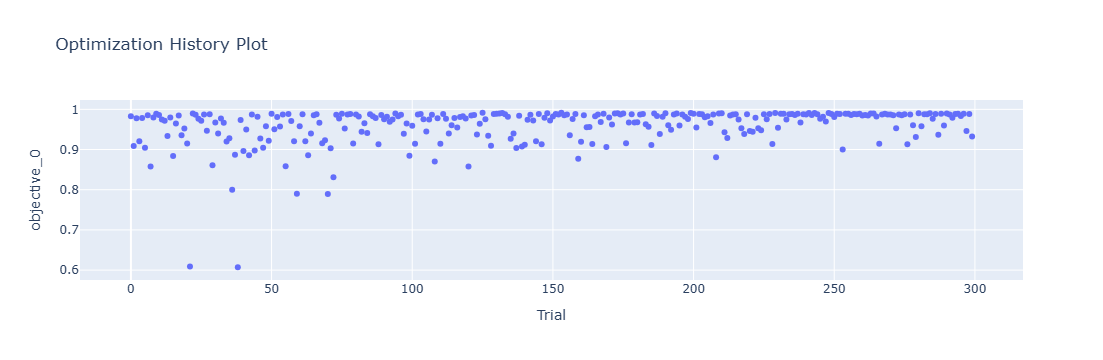

In [98]:
optuna.visualization.plot_optimization_history(study,target=lambda t: t.values[0], target_name='objective_0')

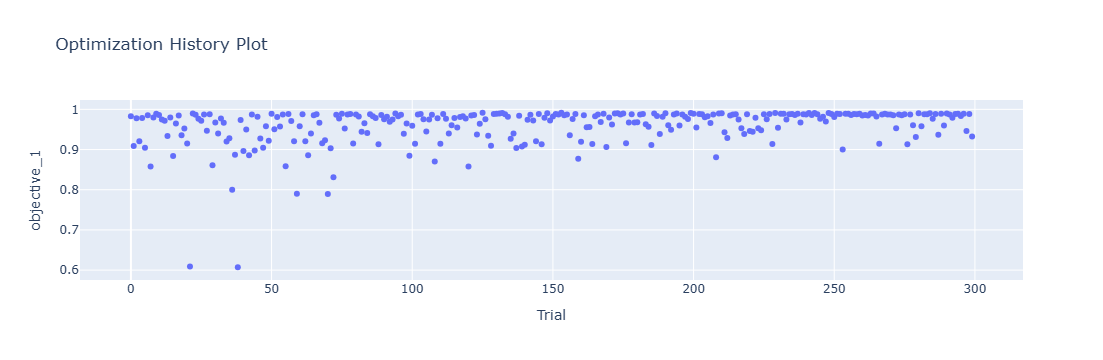

In [99]:
optuna.visualization.plot_optimization_history(study,target=lambda t: t.values[0], target_name='objective_1')

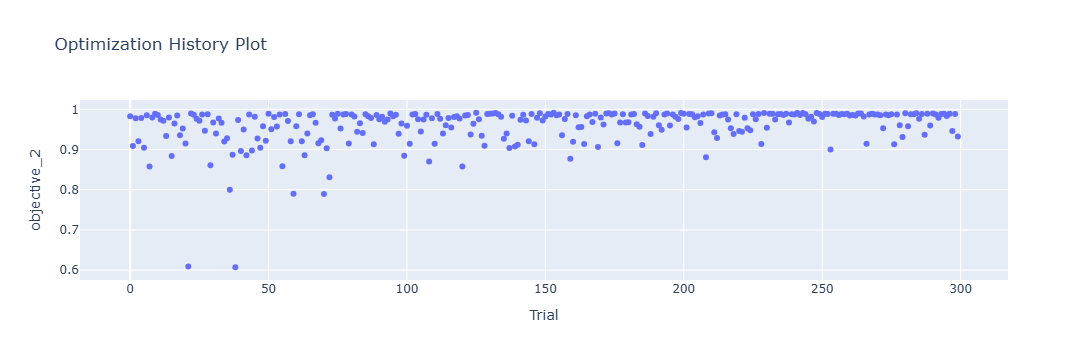

In [100]:
optuna.visualization.plot_optimization_history(study,target=lambda t: t.values[0], target_name='objective_2')

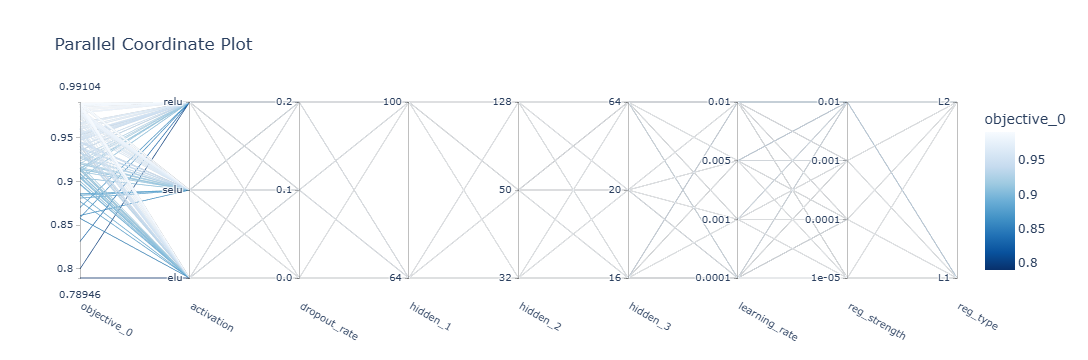

In [101]:
optuna.visualization.plot_parallel_coordinate(study,target=lambda t: t.values[0], target_name='objective_0')

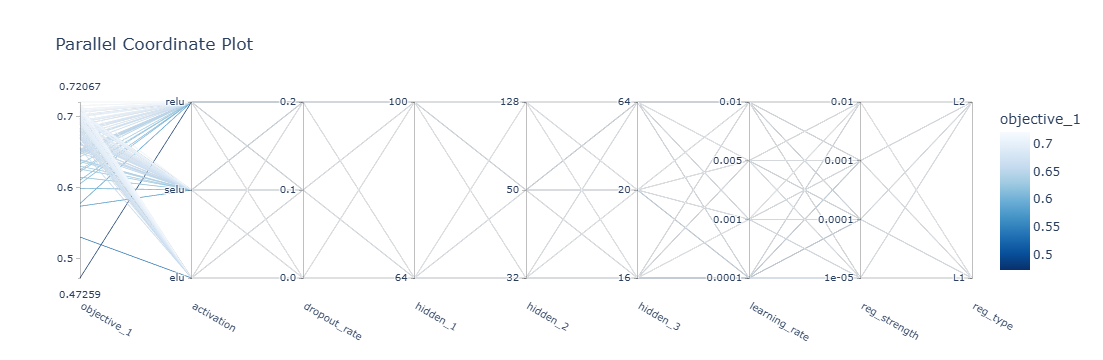

In [102]:
optuna.visualization.plot_parallel_coordinate(study,target=lambda t: t.values[1], target_name='objective_1')

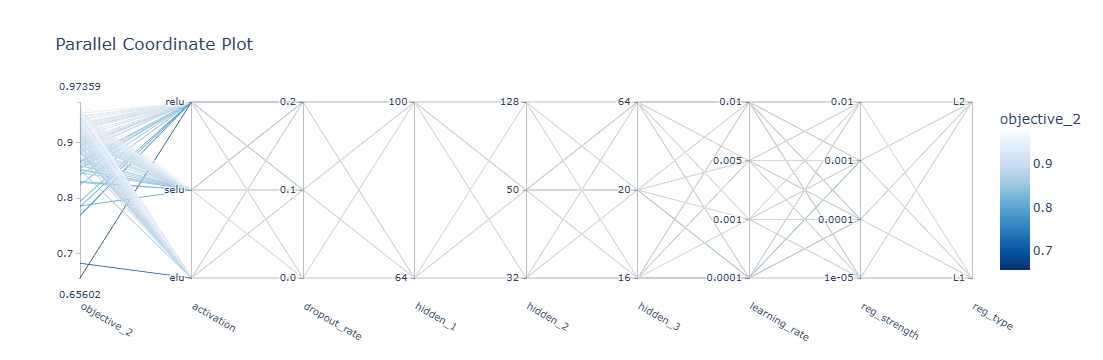

In [103]:
optuna.visualization.plot_parallel_coordinate(study,target=lambda t: t.values[2], target_name='objective_2')

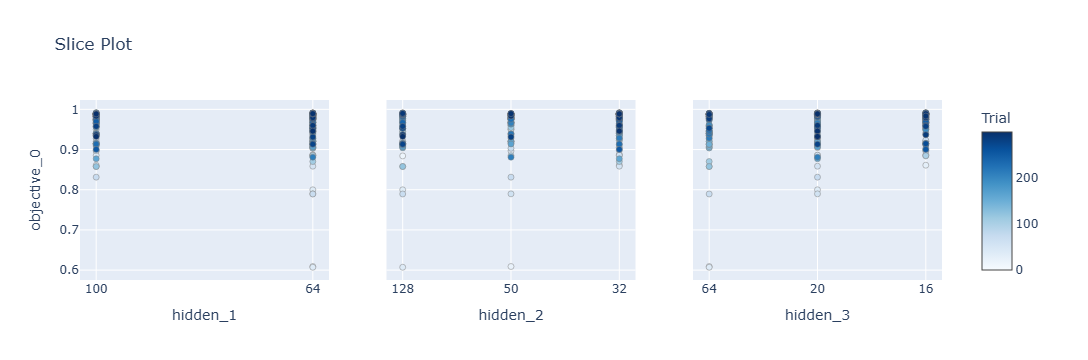

In [104]:
optuna.visualization.plot_slice(study,target=lambda t: t.values[0], target_name='objective_0', params=['hidden_1','hidden_2','hidden_3'])

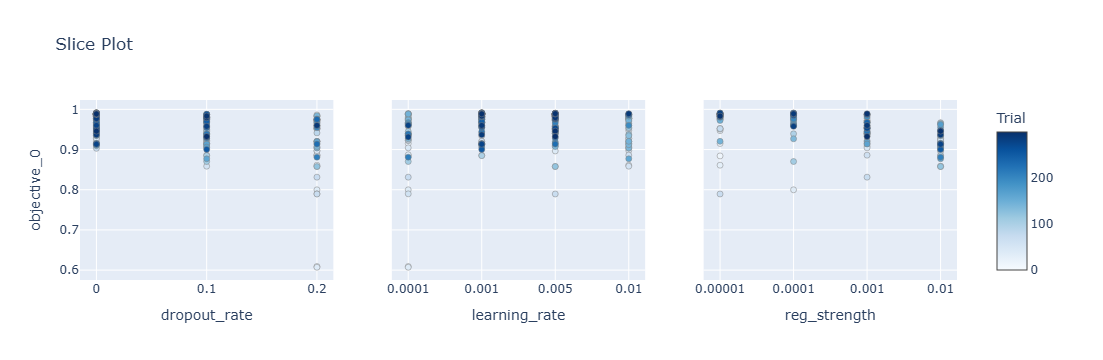

In [105]:
optuna.visualization.plot_slice(study,target=lambda t: t.values[0], target_name='objective_0', params=['dropout_rate','reg_strength','learning_rate'])

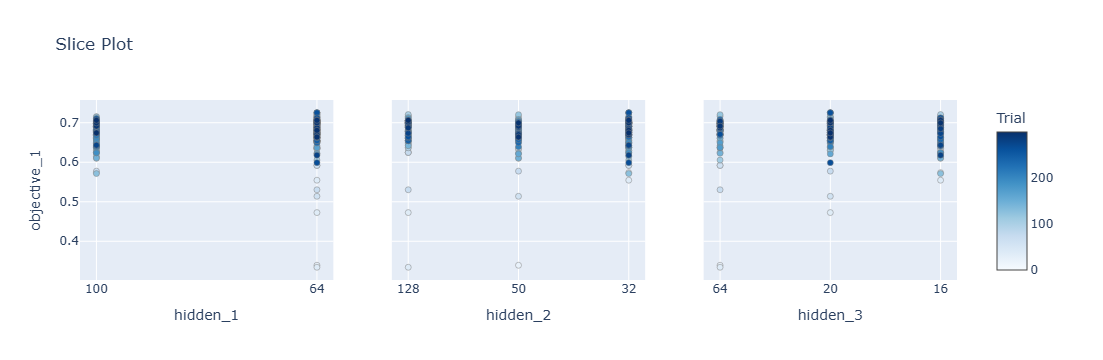

In [106]:
optuna.visualization.plot_slice(study,target=lambda t: t.values[1], target_name='objective_1', params=['hidden_1','hidden_2','hidden_3'])

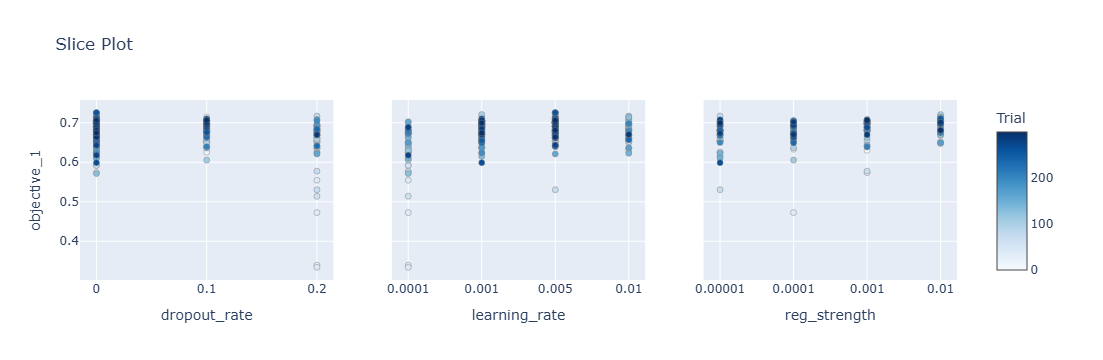

In [107]:
optuna.visualization.plot_slice(study,target=lambda t: t.values[1], target_name='objective_1', params=['dropout_rate','reg_strength','learning_rate'])

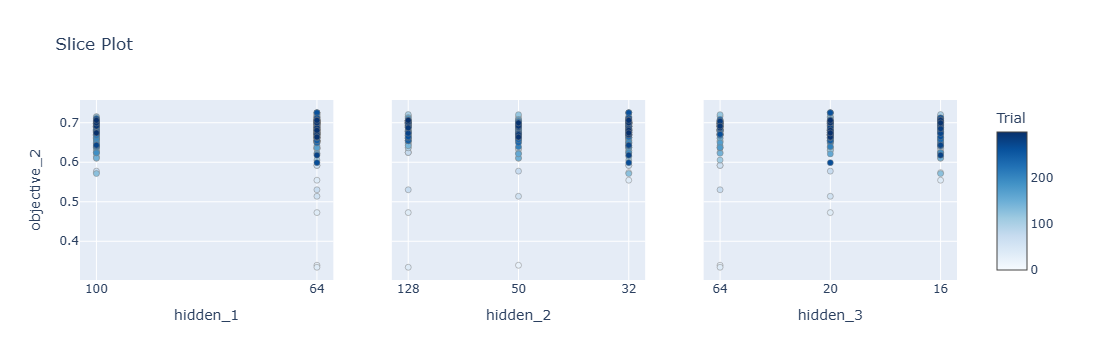

In [108]:
optuna.visualization.plot_slice(study,target=lambda t: t.values[1], target_name='objective_2', params=['hidden_1','hidden_2','hidden_3'])

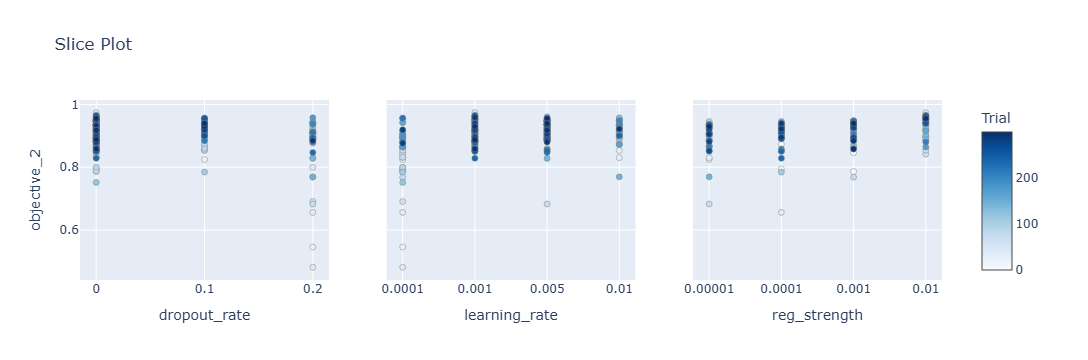

In [109]:
optuna.visualization.plot_slice(study,target=lambda t: t.values[2], target_name='objective_2', params=['dropout_rate','reg_strength','learning_rate'])

In [138]:
best_models_optuna_pd_42 = pd.DataFrame({'Trial number': [best_models[i].number for i in range(len(best_models))],
                                             'Train R2': [best_models[i].values[0] for i in range(len(best_models))],
                                             'Test R2': [best_models[i].values[2] for i in range(len(best_models))],
                                             'CV R2': [best_models[i].values[1] for i in range(len(best_models))],
                                             'hidden_layer_1': [best_models[i].params['hidden_1'] for i in range(len(best_models))],
                                             'hidden_layer_2': [best_models[i].params['hidden_2'] for i in range(len(best_models))],
                                             'hidden_layer_3': [best_models[i].params['hidden_3'] for i in range(len(best_models))],
                                             'learning_rate': [best_models[i].params['learning_rate'] for i in range(len(best_models))],
                                             'dropout_rate': [best_models[i].params['dropout_rate'] for i in range(len(best_models))],
                                             'reg_strength': [best_models[i].params['reg_strength'] if best_models[i].params['reg_type'] != 'None' else 0.0 for i in range(len(best_models))],
                                             'activation_type': [best_models[i].params['activation'] for i in range(len(best_models))]
                                            })
best_models_optuna_pd_42.to_excel('Results_Mu/FFNN_HP_Optuna_42.xlsx')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
R2 scores (train, val, test) =  0.984986894219962 0.7252563738484108 0.9477817556380637
MAE values (train, val, test) =  0.03881968230812442 0.17514402595677553 0.13067525044960174
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


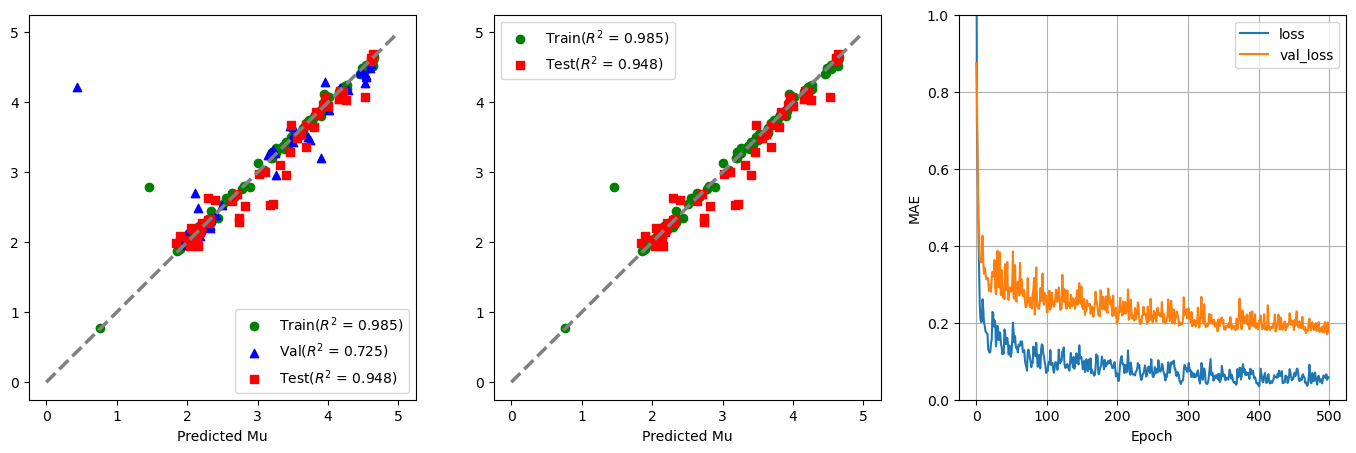

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [137]:
## Best trials

def detailed_objective(trial):

    hidden_layer_1  = trial.suggest_categorical('hidden_1', [100, 64])
    hidden_layer_2 = trial.suggest_categorical('hidden_2', [128, 50, 32])
    hidden_layer_3 = trial.suggest_categorical('hidden_3', [64, 20, 16])
    dropout_rate = trial.suggest_categorical('dropout_rate', [0.0, 0.1, 0.2])
    reg_type = trial.suggest_categorical('reg_type', ['None', 'L1', 'L2'])
    reg_strength = trial.suggest_categorical('reg_strength', [1e-5, 1e-4, 1e-3, 1e-2]) if reg_type != 'None' else 0.0
    learning_rate = trial.suggest_categorical('learning_rate', [1e-4, 1e-3, 5e-3, 1e-2])
    activation_type = trial.suggest_categorical('activation', ['relu', 'elu', 'selu'])

    SEED = 42
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)
    
    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(np.array(X_train))
    
    if reg_type == 'L1':
        reg = regularizers.l1(reg_strength)
    elif reg_type == 'L2':
        reg = regularizers.l2(reg_strength)
    else:
        reg = None  # No regularization  

    model = tf.keras.Sequential([normalizer])

    model.add(layers.Dense(hidden_layer_1, activation=activation_type, kernel_regularizer=reg))
    model.add(layers.Dropout(dropout_rate, seed=SEED))
    model.add(layers.Dense(hidden_layer_2, activation=activation_type, kernel_regularizer=reg))
    model.add(layers.Dropout(dropout_rate, seed=SEED))
    model.add(layers.Dense(hidden_layer_3, activation=activation_type, kernel_regularizer=reg))
    model.add(layers.Dropout(dropout_rate, seed=SEED))
    model.add(layers.Dense(1))  

    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mean_absolute_error')

    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0, shuffle=False)

    # Return best validation loss
    # return min(history.history['val_loss'])

    # Return best R2 scores
    r2_train = r2_score(y_train, model.predict(X_train).flatten())
    r2_val = r2_score(y_val, model.predict(X_val).flatten())
    r2_test = r2_score(y_test, model.predict(X_test).flatten())

    # Return best MSE scores
    mae_train = mean_absolute_error(y_train, model.predict(X_train).flatten())
    mae_val = mean_absolute_error(y_val, model.predict(X_val).flatten())
    mae_test = mean_absolute_error(y_test, model.predict(X_test).flatten())

    print('R2 scores (train, val, test) = ', r2_train,r2_val,r2_test)
    print('MAE values (train, val, test) = ', mae_train,mae_val,mae_test)


    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(17,5))
    ax1.scatter(y_train, model.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax1.scatter(y_val, model.predict(X_val).flatten(),label='Val($R^2$ = '+str(f'{r2_val:.3f}')+')',marker='^',color='blue')
    ax1.scatter(y_test, model.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax1.set_xlabel('Calculated Mu')
    ax1.set_xlabel('Predicted Mu')
    ax1.plot([0,5], [0,5],linewidth=2.5, color='gray', linestyle='dashed')
    ax1.legend()
    
    ax2.scatter(y_train, model.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax2.scatter(y_test, model.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax2.set_xlabel('Calculated Mu')
    ax2.set_xlabel('Predicted Mu')
    ax2.plot([0,5], [0,5],linewidth=2.5, color='gray', linestyle='dashed')
    ax2.legend()

    ax3.plot(history.history['loss'], label='loss')
    ax3.plot(history.history['val_loss'], label='val_loss')
    ax3.set_ylim([0, 1])
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('MAE')
    ax3.legend()
    ax3.grid(True)
        
    plt.show()

    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    
    X_train.to_csv('Results_Mu/optuna_X_train_42.csv',index=False)
    X_val.to_csv('Results_Mu/optuna_X_val_42.csv',index=False)
    X_test.to_csv('Results_Mu/optuna_X_test_42.csv',index=False)
    
    y_train.to_csv('Results_Mu/optuna_y_train_42.csv',index=False)
    y_val.to_csv('Results_Mu/optuna_y_val_42.csv',index=False)
    y_test.to_csv('Results_Mu/optuna_y_test_42.csv',index=False)
    
    pd.DataFrame(y_pred_train).to_csv('Results_Mu/optuna_y_pred_train_42.csv',index=False)
    pd.DataFrame(y_pred_val).to_csv('Results_Mu/optuna_y_pred_val_42.csv',index=False)
    pd.DataFrame(y_pred_test).to_csv('Results_Mu/optuna_y_pred_test_42.csv',index=False) 

    model.save(f'Results_Mu/optuna_model_RS_42.keras')
    
    with open(f'Results_Mu/optuna_model_RS_42.pkl', 'wb') as f:
        pickle.dump(history.history, f)

detailed_objective(study.best_trials[1])

In [161]:
## Prefixed validation set instead of fraction

In [150]:
# RS 47

In [156]:
import tensorflow as tf
import optuna
import numpy as np
from tensorflow.keras import layers, regularizers
from sklearn.metrics import r2_score
import random

train_val_dataset = df_mu_fm.sample(frac = 0.8, random_state = 47)
train_dataset = train_val_dataset.sample(frac = 0.75, random_state = 47)
val_dataset = train_val_dataset.drop(train_dataset.index)
test_dataset = df_mu_fm.drop(train_val_dataset.index)

train_data = np.copy(train_dataset)
val_data = np.copy(val_dataset)
test_data = np.copy(test_dataset)

train_data = pd.DataFrame(train_data)
val_data = pd.DataFrame(val_data)
test_data = pd.DataFrame(test_data)

X_train = train_data.drop([0],axis='columns')
X_val = val_data.drop([0],axis='columns')
X_test = test_data.drop([0],axis='columns')

y_train = train_data[0]
y_val = val_data[0]
y_test = test_data[0]

def objective_0(trial):

    hidden_layer_1  = trial.suggest_categorical('hidden_1', [100, 64])
    hidden_layer_2 = trial.suggest_categorical('hidden_2', [128, 50, 32])
    hidden_layer_3 = trial.suggest_categorical('hidden_3', [64, 20, 16])
    dropout_rate = trial.suggest_categorical('dropout_rate', [0.0, 0.1, 0.2])
    reg_type = trial.suggest_categorical('reg_type', ['None', 'L1', 'L2'])
    reg_strength = trial.suggest_categorical('reg_strength', [1e-5, 1e-4, 1e-3, 1e-2]) if reg_type != 'None' else 0.0
    learning_rate = trial.suggest_categorical('learning_rate', [1e-4, 1e-3, 5e-3, 1e-2])
    activation_type = trial.suggest_categorical('activation', ['relu', 'elu', 'selu'])

    SEED = 47
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)
    
    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(np.array(X_train))
    
    if reg_type == 'L1':
        reg = regularizers.l1(reg_strength)
    elif reg_type == 'L2':
        reg = regularizers.l2(reg_strength)
    else:
        reg = None  # No regularization  

    model = tf.keras.Sequential([normalizer])

    model.add(layers.Dense(hidden_layer_1, activation=activation_type, kernel_regularizer=reg))
    model.add(layers.Dropout(dropout_rate, seed=SEED))
    model.add(layers.Dense(hidden_layer_2, activation=activation_type, kernel_regularizer=reg))
    model.add(layers.Dropout(dropout_rate, seed=SEED))
    model.add(layers.Dense(hidden_layer_3, activation=activation_type, kernel_regularizer=reg))
    model.add(layers.Dropout(dropout_rate, seed=SEED))
    model.add(layers.Dense(1))  

    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mean_absolute_error')

    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0, shuffle=False)

    # Return best validation loss
    # return min(history.history['val_loss'])

    # Return best R2 scores
    r2_train = r2_score(y_train, model.predict(X_train).flatten())
    r2_val = r2_score(y_val, model.predict(X_val).flatten())
    r2_test = r2_score(y_test, model.predict(X_test).flatten())
    return r2_train,r2_val,r2_test

# Run Optuna optimization
#study = optuna.create_study(direction='minimize') # for minimizing loss
study_0 = optuna.create_study(directions=['maximize','maximize','maximize']) # for maximizing R2
study_0.optimize(objective_0, n_trials=100)

[I 2025-03-11 16:06:00,234] A new study created in memory with name: no-name-fac55889-ea53-4221-94cf-755a30566a12


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 16:06:45,743] Trial 0 finished with values: [0.852624802221081, 0.9479979068282406, 0.9464097475489273] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-11 16:07:31,924] Trial 1 finished with values: [0.8614682173877926, 0.9072520135937567, 0.9271922301381208] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-11 16:08:16,409] Trial 2 finished with values: [0.9694956165801094, 0.9134936969548632, 0.8196296903483264] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 16:09:01,953] Trial 3 finished with values: [0.7987466699470367, 0.9261911718949216, 0.9121831172956605] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 16:09:46,560] Trial 4 finished with values: [0.9632128518582095, 0.9205486412178328, 0.8370519893804815] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 16:10:32,585] Trial 5 finished with values: [0.806349057103962, 0.9239624480144939, 0.9638164074186039] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 16:11:18,024] Trial 6 finished with values: [0.9318416350397247, 0.8504096124705072, 0.683098662113658] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 16:12:04,628] Trial 7 finished with values: [0.8084652114748685, 0.9172685080041947, 0.9192416629883351] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 16:12:51,173] Trial 8 finished with values: [0.8270771199913425, 0.8660599199909806, 0.8826221117129782] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 16:13:37,377] Trial 9 finished with values: [0.9769141368054378, 0.8696916596360762, 0.8114698758205723] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-11 16:14:23,012] Trial 10 finished with values: [0.9898847019322373, 0.950637279721888, 0.8610330406303451] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-11 16:15:09,008] Trial 11 finished with values: [0.8052683949970265, 0.9212364520040465, 0.9218939726946662] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 16:15:53,900] Trial 12 finished with values: [0.919967673275071, 0.8785679821693092, 0.8908659269470164] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 16:16:39,747] Trial 13 finished with values: [0.8398455609948301, 0.9150349275030709, 0.9053939492377368] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[I 2025-03-11 16:17:24,914] Trial 14 finished with values: [0.8682124812442014, 0.90768933933455, 0.8850665620881776] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 16:18:11,336] Trial 15 finished with values: [0.9055628702350252, 0.926771330421576, 0.8341508216073019] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 16:18:56,546] Trial 16 finished with values: [0.9882861639730122, 0.9563735670621981, 0.8265697967305343] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 16:19:41,945] Trial 17 finished with values: [0.9022604562528227, 0.9427426070278255, 0.8580646653258509] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 16:20:27,197] Trial 18 finished with values: [0.8184086952942409, 0.8568609352908778, 0.8294285793558938] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


[I 2025-03-11 16:21:13,198] Trial 19 finished with values: [0.8871919329549356, 0.9456057826025475, 0.9382686686348256] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 16:21:58,373] Trial 20 finished with values: [0.8061869796201062, 0.9374297681119078, 0.9588675540532654] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-11 16:22:43,808] Trial 21 finished with values: [0.8592734967778852, 0.9006193084355371, 0.8942341418727675] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


[I 2025-03-11 16:23:29,627] Trial 22 finished with values: [0.8829426029549534, 0.945480861628751, 0.9526546813124294] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 16:24:14,076] Trial 23 finished with values: [0.985776395575823, 0.9764960384893802, 0.840100305908474] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-11 16:24:58,925] Trial 24 finished with values: [0.89491440939602, 0.9145186432650274, 0.8958153856424025] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 16:26:18,761] Trial 25 finished with values: [0.9094565260991424, 0.9595341532105612, 0.9284519518472832] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


[I 2025-03-11 16:27:07,944] Trial 26 finished with values: [0.9346195671184965, 0.9462695461918853, 0.8440757001614516] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-11 16:27:55,161] Trial 27 finished with values: [0.8183817299372979, 0.9412335679753799, 0.9640669141316707] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-11 16:28:41,979] Trial 28 finished with values: [0.8821042608600093, 0.9499981982926414, 0.9507086380355197] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 16:29:28,242] Trial 29 finished with values: [0.9505544545594984, 0.9295826063962642, 0.8083864578058189] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 16:30:14,797] Trial 30 finished with values: [0.7781211754317303, 0.890693660204507, 0.8609869959564418] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 16:31:00,698] Trial 31 finished with values: [0.9408366846343652, 0.9374182348668505, 0.8339271814909264] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 16:31:47,075] Trial 32 finished with values: [0.8607924589018636, 0.9345917183062319, 0.9389844319647126] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-11 16:32:33,782] Trial 33 finished with values: [0.8876058899877264, 0.9298407461880543, 0.8730739401932411] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[I 2025-03-11 16:33:20,389] Trial 34 finished with values: [0.764374472463354, 0.7643351973657587, 0.6773112504996553] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 16:34:08,424] Trial 35 finished with values: [0.9062029802067648, 0.9131294090511167, 0.8614873064357036] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-11 16:34:55,086] Trial 36 finished with values: [0.8868949052946389, 0.9245955755134627, 0.8117950024768747] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-11 16:35:41,873] Trial 37 finished with values: [0.8282639868571177, 0.9301120840553352, 0.9293251739436243] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 16:36:28,472] Trial 38 finished with values: [0.9318452173948308, 0.8844052542405021, 0.7580841147432381] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 16:37:15,417] Trial 39 finished with values: [0.7971366743444392, 0.9205217416226452, 0.9173478578816376] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 16:38:03,609] Trial 40 finished with values: [0.881739732044394, 0.9420413951445289, 0.8761363589671533] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-11 16:38:49,986] Trial 41 finished with values: [0.7990856180367157, 0.8918962494714398, 0.9301014670817598] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 16:39:37,504] Trial 42 finished with values: [0.8394150452868477, 0.8989613743613475, 0.8795760677404304] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 16:40:25,753] Trial 43 finished with values: [0.8909443258294587, 0.9550652998843171, 0.9439557122227071] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-11 16:41:11,125] Trial 44 finished with values: [0.8070120584845295, 0.8869522032336813, 0.8961633292947631] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 16:41:57,055] Trial 45 finished with values: [0.640488865913013, 0.676600529837617, 0.5369622505747094] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 16:42:45,504] Trial 46 finished with values: [0.8436966217026418, 0.9209344283111709, 0.897822233572748] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 16:43:32,987] Trial 47 finished with values: [0.8139292577093209, 0.8161394884486007, 0.7463015729686971] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 16:44:18,945] Trial 48 finished with values: [0.9378981093651203, 0.9267877760617248, 0.9286320442992773] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 16:45:03,927] Trial 49 finished with values: [0.9964849392458753, 0.9504465018183862, 0.8734742665650813] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 16:45:51,099] Trial 50 finished with values: [0.8206029821831552, 0.8916445013942766, 0.8830768429382059] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


[I 2025-03-11 16:46:36,682] Trial 51 finished with values: [0.8646559374877087, 0.9466307030206849, 0.9028075924661543] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 16:47:22,075] Trial 52 finished with values: [0.8212774839085047, 0.8403113450303402, 0.8795527388314661] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 16:48:07,669] Trial 53 finished with values: [0.924155861599375, 0.8192343874599519, 0.6869170688831177] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 16:48:55,847] Trial 54 finished with values: [0.9346195671184965, 0.9462695461918853, 0.8440757001614516] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 16:49:42,504] Trial 55 finished with values: [0.8821042608600093, 0.9499981982926414, 0.9507086380355197] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 16:50:27,526] Trial 56 finished with values: [0.8977173432093954, 0.9456227444006253, 0.9387607167827448] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


[I 2025-03-11 16:51:11,560] Trial 57 finished with values: [0.8925771124233763, 0.8871148062013984, 0.8896180192485702] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 16:51:56,937] Trial 58 finished with values: [0.8696896774706184, 0.909923133346861, 0.8840519873467473] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 16:52:41,336] Trial 59 finished with values: [0.9654190832680858, 0.9421415072715618, 0.8725214957903035] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-11 16:53:26,251] Trial 60 finished with values: [0.9930900171788494, 0.939814338711794, 0.8923333424008236] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 16:54:10,312] Trial 61 finished with values: [0.9694956165801094, 0.9134936969548632, 0.8196296903483264] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-03-11 16:54:55,158] Trial 62 finished with values: [0.9355359865532346, 0.8771742642813835, 0.790089306044703] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 16:55:40,881] Trial 63 finished with values: [0.8237191638600414, 0.9341848260719043, 0.9575421353006381] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-11 16:56:25,376] Trial 64 finished with values: [0.9860204050135966, 0.8488040298497408, 0.8266588745199195] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 16:57:09,628] Trial 65 finished with values: [0.9629531157026359, 0.9431063890123895, 0.8797289981158163] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 16:57:54,781] Trial 66 finished with values: [0.8055497457251268, 0.9316775620320532, 0.946618806353332] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 16:58:40,876] Trial 67 finished with values: [0.806349057103962, 0.9239624480144939, 0.9638164074186039] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 16:59:25,971] Trial 68 finished with values: [0.8830337506096873, 0.8976907832394649, 0.7424234638856884] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


[I 2025-03-11 17:00:10,662] Trial 69 finished with values: [0.8958706919909954, 0.9566582988763794, 0.9313243854784806] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2025-03-11 17:00:56,057] Trial 70 finished with values: [0.806214494549913, 0.9112020942608121, 0.9413702733455115] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 17:01:41,399] Trial 71 finished with values: [0.8230475960262811, 0.9384412377234408, 0.9578389796413461] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[I 2025-03-11 17:02:26,346] Trial 72 finished with values: [0.8626858756599385, 0.9327325423475931, 0.9108105939464006] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-11 17:03:11,209] Trial 73 finished with values: [0.8827714501978088, 0.9397078065524339, 0.8674316851043817] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 17:03:55,674] Trial 74 finished with values: [0.808577861894088, 0.9415010680025155, 0.9582964280647858] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-03-11 17:04:40,950] Trial 75 finished with values: [0.8435257767271704, 0.9006813595864943, 0.9025687046563844] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[I 2025-03-11 17:05:26,142] Trial 76 finished with values: [0.8985675991661478, 0.8522186064664232, 0.6959075533572295] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-11 17:06:10,346] Trial 77 finished with values: [0.8606071897322203, 0.9146759854284978, 0.8963533896565385] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 17:06:55,956] Trial 78 finished with values: [0.8378482192101856, 0.9357977615486572, 0.9517665543658251] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 17:07:40,429] Trial 79 finished with values: [0.8625258125741041, 0.8994364033403103, 0.9183950444984316] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-11 17:08:26,004] Trial 80 finished with values: [0.8567621248373241, 0.9073411782596231, 0.9046429809263047] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-03-11 17:09:10,304] Trial 81 finished with values: [0.9616552072421258, 0.9294914292665142, 0.8836930547130649] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 17:09:55,271] Trial 82 finished with values: [0.8663144849957187, 0.9166892727320375, 0.8133604020244002] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 17:10:40,181] Trial 83 finished with values: [0.9122707752570138, 0.9531445565451311, 0.8293910410886632] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


[I 2025-03-11 17:11:25,312] Trial 84 finished with values: [0.9853481912704691, 0.9502610571570146, 0.8818386320283639] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 17:12:10,131] Trial 85 finished with values: [0.8784474367679511, 0.8698436145570907, 0.9075985867309599] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 17:12:55,134] Trial 86 finished with values: [0.9546638129247327, 0.8968142160392107, 0.8732279240155401] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 17:13:40,022] Trial 87 finished with values: [0.8812198227516386, 0.9556877783750218, 0.8718426562932597] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 17:14:24,209] Trial 88 finished with values: [0.9686226976543629, 0.9188167284741707, 0.7850556432906837] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 17:15:08,330] Trial 89 finished with values: [0.9307465231675315, 0.9528302698474356, 0.888769039099407] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-11 17:15:53,196] Trial 90 finished with values: [0.8011039132764395, 0.9279905506168026, 0.9090493727024381] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 17:16:37,682] Trial 91 finished with values: [0.9979581824864658, 0.921537403981045, 0.8538975116416475] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 17:17:22,656] Trial 92 finished with values: [0.9017103522800991, 0.9562755363268896, 0.8766241344919418] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-11 17:18:08,300] Trial 93 finished with values: [0.8266891789321368, 0.9454881473057997, 0.9685562083058838] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-11 17:18:52,767] Trial 94 finished with values: [0.9949126198581592, 0.9353586606619296, 0.8247746205489868] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


[I 2025-03-11 17:19:37,990] Trial 95 finished with values: [0.8991627851278565, 0.9667224368753153, 0.9081197462039071] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 17:20:23,189] Trial 96 finished with values: [0.9086955170039196, 0.9118537608450623, 0.8084239184241628] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 17:21:07,179] Trial 97 finished with values: [0.9930900171788494, 0.939814338711794, 0.8923333424008236] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 17:21:52,096] Trial 98 finished with values: [0.9054980838890843, 0.9473195066427891, 0.8326530314797475] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 17:22:36,378] Trial 99 finished with values: [0.8857033113517179, 0.942089436785431, 0.8704251380414484] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'relu'}.


In [158]:
best_models_47 = study_0.best_trials

In [159]:
best_models_47

[FrozenTrial(number=10, state=1, values=[0.9898847019322373, 0.950637279721888, 0.8610330406303451], datetime_start=datetime.datetime(2025, 3, 11, 16, 13, 37, 377138), datetime_complete=datetime.datetime(2025, 3, 11, 16, 14, 23, 11271), params={'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, distributions={'hidden_1': CategoricalDistribution(choices=(100, 64)), 'hidden_2': CategoricalDistribution(choices=(128, 50, 32)), 'hidden_3': CategoricalDistribution(choices=(64, 20, 16)), 'dropout_rate': CategoricalDistribution(choices=(0.0, 0.1, 0.2)), 'reg_type': CategoricalDistribution(choices=('None', 'L1', 'L2')), 'learning_rate': CategoricalDistribution(choices=(0.0001, 0.001, 0.005, 0.01)), 'activation': CategoricalDistribution(choices=('relu', 'elu', 'selu'))}, trial_id=10, value=None),
 FrozenTrial(number=16, state=1, values=[

In [160]:
best_models_47 = study_0.best_trials
#PRINT('Trial number',
for i in range(len(best_models_47)):
    print('Model No:',i,'\n=======', '\nTrial No:',best_models_47[i].number, '\nTrain R2:',best_models_47[i].values[0],'\nValid R2:',best_models_47[i].values[1],
         '\nTest  R2:',best_models_47[i].values[2],'\nParams  :',best_models_47[i].params,'\n=======')

Model No: 0 
Trial No: 10 
Train R2: 0.9898847019322373 
Valid R2: 0.950637279721888 
Test  R2: 0.8610330406303451 
Params  : {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'} 
Model No: 1 
Trial No: 16 
Train R2: 0.9882861639730122 
Valid R2: 0.9563735670621981 
Test  R2: 0.8265697967305343 
Params  : {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'selu'} 
Model No: 2 
Trial No: 22 
Train R2: 0.8829426029549534 
Valid R2: 0.945480861628751 
Test  R2: 0.9526546813124294 
Params  : {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'} 
Model No: 3 
Trial No: 23 
Train R2: 0.985776395575823 
Valid R2: 0.9764960384893802 
Test  R2: 0.840100305908474 
Params  : {'hidden_1': 100, 'hidden_2': 128, 'hidden_

In [ ]:
# Model No: 0 
# ======= 
# Trial No: 10 
# Train R2: 0.9898847019322373 
# Valid R2: 0.950637279721888 
# Test  R2: 0.8610330406303451 
# Params  : {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'} 
# =======
# Model No: 1 
# ======= 
# Trial No: 16 
# Train R2: 0.9882861639730122 
# Valid R2: 0.9563735670621981 
# Test  R2: 0.8265697967305343 
# Params  : {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'selu'} 
# =======
# Model No: 2 
# ======= 
# Trial No: 22 
# Train R2: 0.8829426029549534 
# Valid R2: 0.945480861628751 
# Test  R2: 0.9526546813124294 
# Params  : {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'} 
# =======
# Model No: 3 
# ======= 
# Trial No: 23 
# Train R2: 0.985776395575823 
# Valid R2: 0.9764960384893802 
# Test  R2: 0.840100305908474 
# Params  : {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'} 
# =======
# Model No: 4 
# ======= 
# Trial No: 25 
# Train R2: 0.9094565260991424 
# Valid R2: 0.9595341532105612 
# Test  R2: 0.9284519518472832 
# Params  : {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'} 
# =======
# Model No: 5 
# ======= 
# Trial No: 28 
# Train R2: 0.8821042608600093 
# Valid R2: 0.9499981982926414 
# Test  R2: 0.9507086380355197 
# Params  : {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'} 
# =======
# Model No: 6 
# ======= 
# Trial No: 43 
# Train R2: 0.8909443258294587 
# Valid R2: 0.9550652998843171 
# Test  R2: 0.9439557122227071 
# Params  : {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'selu'} 
# =======
# Model No: 7 
# ======= 
# Trial No: 48 
# Train R2: 0.9378981093651203 
# Valid R2: 0.9267877760617248 
# Test  R2: 0.9286320442992773 
# Params  : {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'relu'} 
# =======
# Model No: 8 
# ======= 
# Trial No: 49 
# Train R2: 0.9964849392458753 
# Valid R2: 0.9504465018183862 
# Test  R2: 0.8734742665650813 
# Params  : {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'elu'} 
# =======
# Model No: 9 
# ======= 
# Trial No: 55 
# Train R2: 0.8821042608600093 
# Valid R2: 0.9499981982926414 
# Test  R2: 0.9507086380355197 
# Params  : {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'} 
# =======
# Model No: 10 
# ======= 
# Trial No: 56 
# Train R2: 0.8977173432093954 
# Valid R2: 0.9456227444006253 
# Test  R2: 0.9387607167827448 
# Params  : {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'} 
# =======
# Model No: 11 
# ======= 
# Trial No: 60 
# Train R2: 0.9930900171788494 
# Valid R2: 0.939814338711794 
# Test  R2: 0.8923333424008236 
# Params  : {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'relu'} 
# =======
# Model No: 12 
# ======= 
# Trial No: 69 
# Train R2: 0.8958706919909954 
# Valid R2: 0.9566582988763794 
# Test  R2: 0.9313243854784806 
# Params  : {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'} 
# =======
# Model No: 13 
# ======= 
# Trial No: 84 
# Train R2: 0.9853481912704691 
# Valid R2: 0.9502610571570146 
# Test  R2: 0.8818386320283639 
# Params  : {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'relu'} 
# =======
# Model No: 14 
# ======= 
# Trial No: 89 
# Train R2: 0.9307465231675315 
# Valid R2: 0.9528302698474356 
# Test  R2: 0.888769039099407 
# Params  : {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'relu'} 
# =======
# Model No: 15 
# ======= 
# Trial No: 91 
# Train R2: 0.9979581824864658 
# Valid R2: 0.921537403981045 
# Test  R2: 0.8538975116416475 
# Params  : {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'} 
# =======
# Model No: 16 
# ======= 
# Trial No: 93 
# Train R2: 0.8266891789321368 
# Valid R2: 0.9454881473057997 
# Test  R2: 0.9685562083058838 
# Params  : {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'selu'} 
# =======
# Model No: 17 
# ======= 
# Trial No: 95 
# Train R2: 0.8991627851278565 
# Valid R2: 0.9667224368753153 
# Test  R2: 0.9081197462039071 
# Params  : {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'relu'} 
# =======
# Model No: 18 
# ======= 
# Trial No: 97 
# Train R2: 0.9930900171788494 
# Valid R2: 0.939814338711794 
# Test  R2: 0.8923333424008236 
# Params  : {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'relu'} 
# =======


In [163]:
best_models_optuna_pd_47 = pd.DataFrame({'Trial number': [best_models_47[i].number for i in range(len(best_models_47))],
                                             'Train R2': [best_models_47[i].values[0] for i in range(len(best_models_47))],
                                             'Test R2': [best_models_47[i].values[2] for i in range(len(best_models_47))],
                                             'CV R2': [best_models_47[i].values[1] for i in range(len(best_models_47))],
                                             'hidden_layer_1': [best_models_47[i].params['hidden_1'] for i in range(len(best_models_47))],
                                             'hidden_layer_2': [best_models_47[i].params['hidden_2'] for i in range(len(best_models_47))],
                                             'hidden_layer_3': [best_models_47[i].params['hidden_3'] for i in range(len(best_models_47))],
                                             'learning_rate': [best_models_47[i].params['learning_rate'] for i in range(len(best_models_47))],
                                             'dropout_rate': [best_models_47[i].params['dropout_rate'] for i in range(len(best_models_47))],
                                             'reg_strength': [best_models_47[i].params['reg_strength'] if best_models_47[i].params['reg_type'] != 'None' else 0.0 for i in range(len(best_models_47))],
                                             'activation_type': [best_models_47[i].params['activation'] for i in range(len(best_models_47))]
                                            })
best_models_optuna_pd_47.to_excel('Results_Mu/FFNN_HP_Optuna_47.xlsx')

In [214]:
## Best trials

def detailed_objective_47(trial):

    hidden_layer_1  = trial.suggest_categorical('hidden_1', [100, 64])
    hidden_layer_2 = trial.suggest_categorical('hidden_2', [128, 50, 32])
    hidden_layer_3 = trial.suggest_categorical('hidden_3', [64, 20, 16])
    dropout_rate = trial.suggest_categorical('dropout_rate', [0.0, 0.1, 0.2])
    reg_type = trial.suggest_categorical('reg_type', ['None', 'L1', 'L2'])
    reg_strength = trial.suggest_categorical('reg_strength', [1e-5, 1e-4, 1e-3, 1e-2]) if reg_type != 'None' else 0.0
    learning_rate = trial.suggest_categorical('learning_rate', [1e-4, 1e-3, 5e-3, 1e-2])
    activation_type = trial.suggest_categorical('activation', ['relu', 'elu', 'selu'])

    SEED = 47
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)
    
    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(np.array(X_train))
    
    if reg_type == 'L1':
        reg = regularizers.l1(best_models_47[0].params['reg_strength'])
    elif reg_type == 'L2':
        reg = regularizers.l2(best_models_47[0].params['reg_strength'])
    else:
        reg = None  # No regularization  

    model = tf.keras.Sequential([normalizer])

    model.add(layers.Dense(best_models_47[0].params['hidden_1'], activation=best_models_47[0].params['activation'], kernel_regularizer=reg))
    model.add(layers.Dropout(best_models_47[0].params['dropout_rate'], seed=SEED))
    model.add(layers.Dense(best_models_47[0].params['hidden_2'], activation=best_models_47[0].params['activation'], kernel_regularizer=reg))
    model.add(layers.Dropout(best_models_47[0].params['dropout_rate'], seed=SEED))
    model.add(layers.Dense(best_models_47[0].params['hidden_3'], activation=best_models_47[0].params['activation'], kernel_regularizer=reg))
    model.add(layers.Dropout(best_models_47[0].params['dropout_rate'], seed=SEED))
    model.add(layers.Dense(1))  

    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(best_models_47[0].params['learning_rate']), loss='mean_absolute_error')

    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0, shuffle=False)

    # Return best validation loss
    # return min(history.history['val_loss'])

    # Return best R2 scores
    r2_train = r2_score(y_train, model.predict(X_train).flatten())
    r2_val = r2_score(y_val, model.predict(X_val).flatten())
    r2_test = r2_score(y_test, model.predict(X_test).flatten())

    # Return best MSE scores
    mae_train = mean_absolute_error(y_train, model.predict(X_train).flatten())
    mae_val = mean_absolute_error(y_val, model.predict(X_val).flatten())
    mae_test = mean_absolute_error(y_test, model.predict(X_test).flatten())

    print('R2 scores (train, val, test) = ', r2_train,r2_val,r2_test)
    print('MAE values (train, val, test) = ', mae_train,mae_val,mae_test)

    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(17,5))
    ax1.scatter(y_train, model.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax1.scatter(y_val, model.predict(X_val).flatten(),label='Val($R^2$ = '+str(f'{r2_val:.3f}')+')',marker='^',color='blue')
    ax1.scatter(y_test, model.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax1.set_xlabel('Calculated Mu')
    ax1.set_ylabel('Predicted Mu')
    ax1.plot([0,5], [0,5],linewidth=2.5, color='gray', linestyle='dashed')
    ax1.legend()
    
    ax2.scatter(y_train, model.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax2.scatter(y_test, model.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax2.set_xlabel('Calculated Mu')
    ax2.set_ylabel('Predicted Mu')
    ax2.plot([0,5], [0,5],linewidth=2.5, color='gray', linestyle='dashed')
    ax2.legend()

    ax3.plot(history.history['loss'], label='loss')
    ax3.plot(history.history['val_loss'], label='val_loss')
    ax3.set_ylim([0, 1])
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('MAE')
    ax3.legend()
    ax3.grid(True)
        
    plt.show()

    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    
    X_train.to_csv('Results_Mu/optuna_X_train_47.csv',index=False)
    X_val.to_csv('Results_Mu/optuna_X_val_47.csv',index=False)
    X_test.to_csv('Results_Mu/optuna_X_test_47.csv',index=False)
    
    y_train.to_csv('Results_Mu/optuna_y_train_47.csv',index=False)
    y_val.to_csv('Results_Mu/optuna_y_val_47.csv',index=False)
    y_test.to_csv('Results_Mu/optuna_y_test_47.csv',index=False)
    
    pd.DataFrame(y_pred_train).to_csv('Results_Mu/optuna_y_pred_train_47_0.csv',index=False)
    pd.DataFrame(y_pred_val).to_csv('Results_Mu/optuna_y_pred_val_47_0.csv',index=False)
    pd.DataFrame(y_pred_test).to_csv('Results_Mu/optuna_y_pred_test_47_0.csv',index=False) 

    model.save(f'Results_Mu/optuna_model_RS_47_0.keras')
    
    with open(f'Results_Mu/optuna_model_RS_47_0.pkl', 'wb') as f:
        pickle.dump(history.history, f)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
R2 scores (train, val, test) =  0.9307465231675315 0.9528302698474356 0.888769039099407
MAE values (train, val, test) =  0.08793210375013495 0.12981749800575013 0.19822113118189907
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


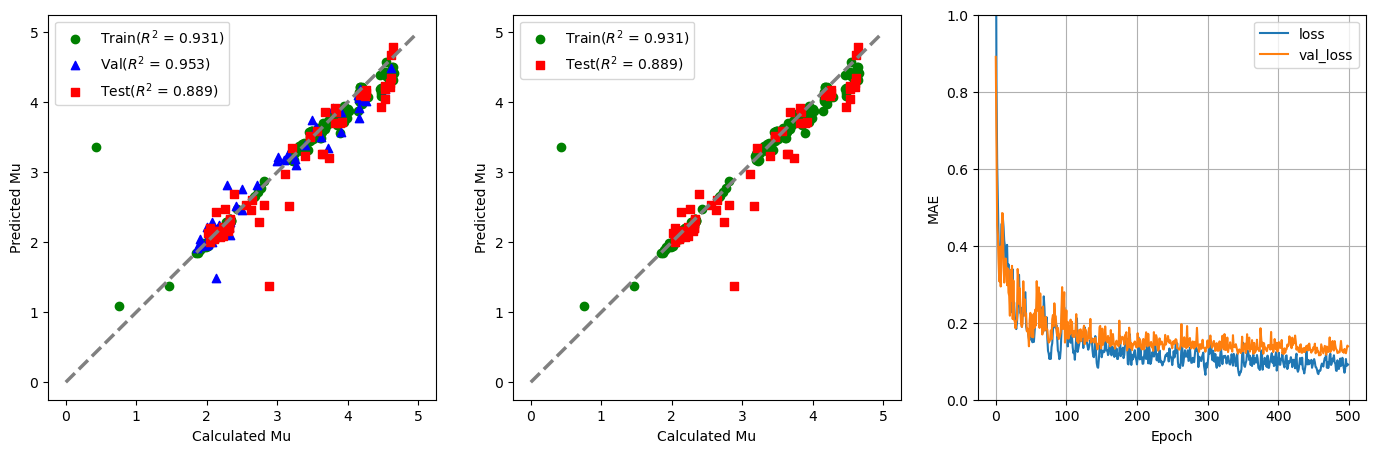

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [203]:
detailed_objective_47(study_0.best_trials[14])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
R2 scores (train, val, test) =  0.9853481912704691 0.9502610571570146 0.8818386320283639
MAE values (train, val, test) =  0.08214316574878625 0.13113883003983262 0.22261963282120112
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


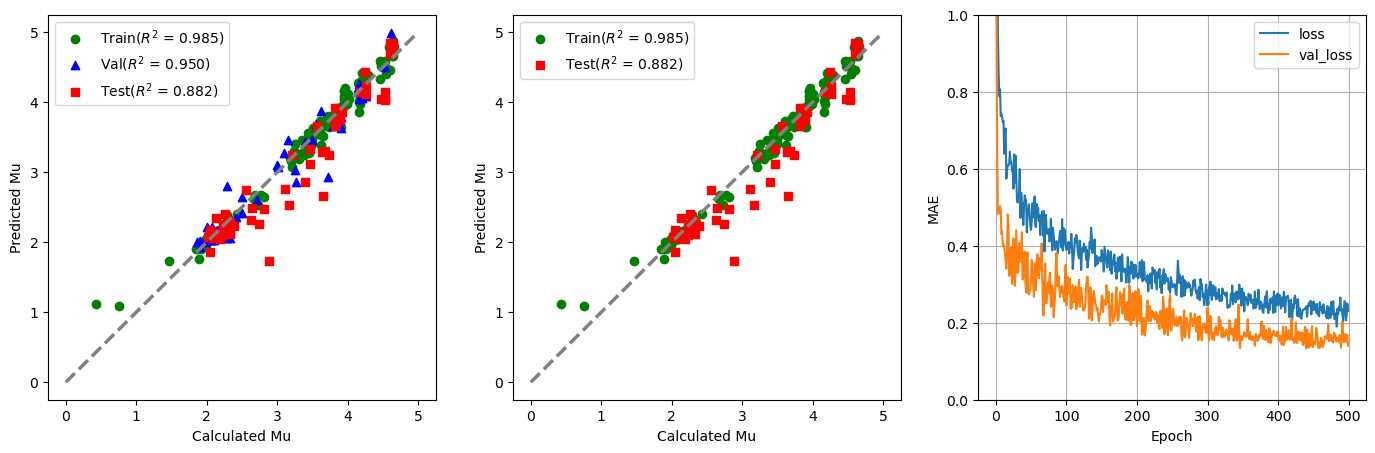

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [205]:
detailed_objective_47(study_0.best_trials[13])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
R2 scores (train, val, test) =  0.9930900171788494 0.939814338711794 0.8923333424008236
MAE values (train, val, test) =  0.059092465066459834 0.1355513417406575 0.1794945441961571
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


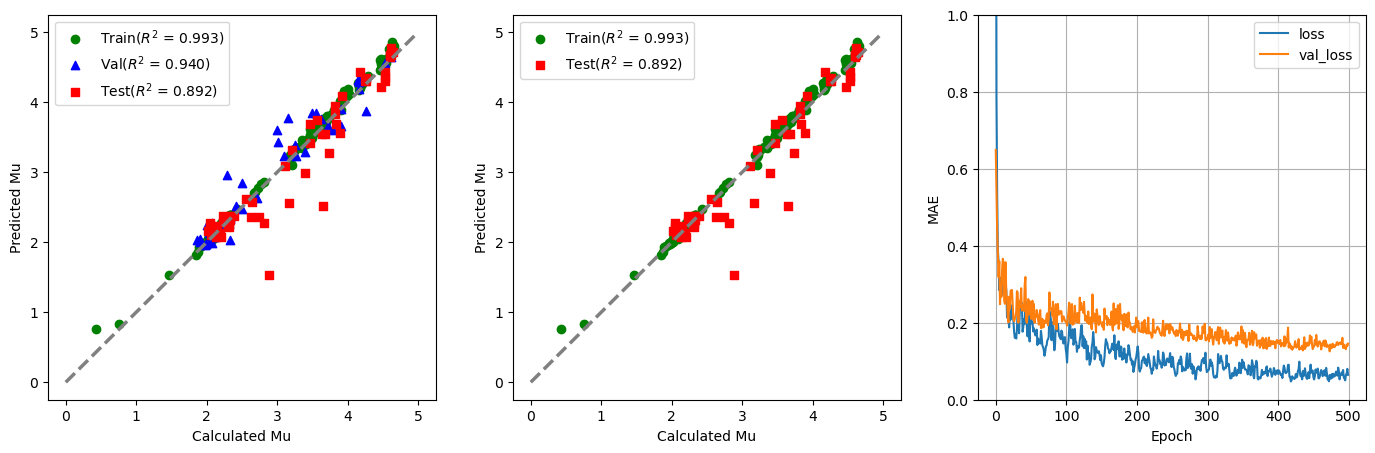

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [207]:
detailed_objective_47(study_0.best_trials[11])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
R2 scores (train, val, test) =  0.9964849392458753 0.9504465018183862 0.8734742665650813
MAE values (train, val, test) =  0.04094140805349774 0.1223982148651448 0.1814284327310216
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


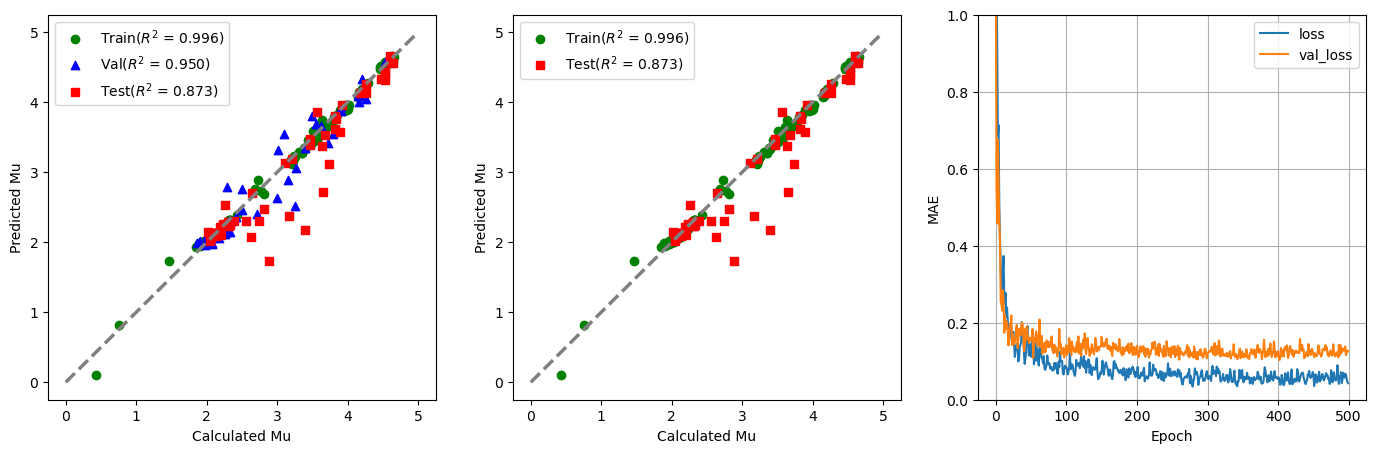

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [209]:
detailed_objective_47(study_0.best_trials[8])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
R2 scores (train, val, test) =  0.9378981093651203 0.9267877760617248 0.9286320442992773
MAE values (train, val, test) =  0.07242578169203641 0.13548512992112371 0.14657011994742403
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


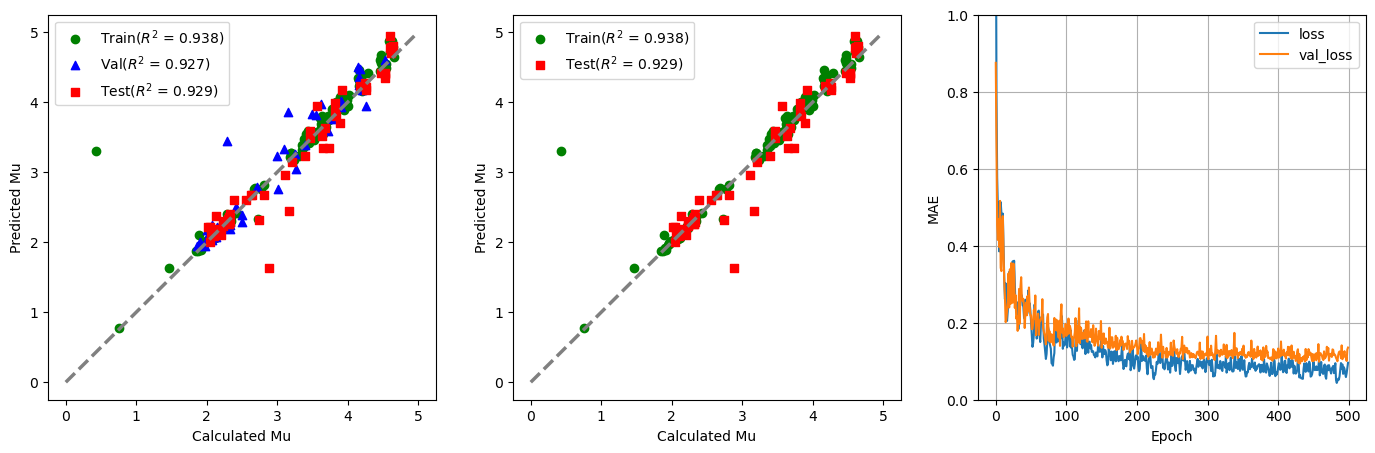

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [211]:
detailed_objective_47(study_0.best_trials[7])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
R2 scores (train, val, test) =  0.985776395575823 0.9764960384893802 0.840100305908474
MAE values (train, val, test) =  0.055214211279305876 0.08996978659175167 0.18099703845407314
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


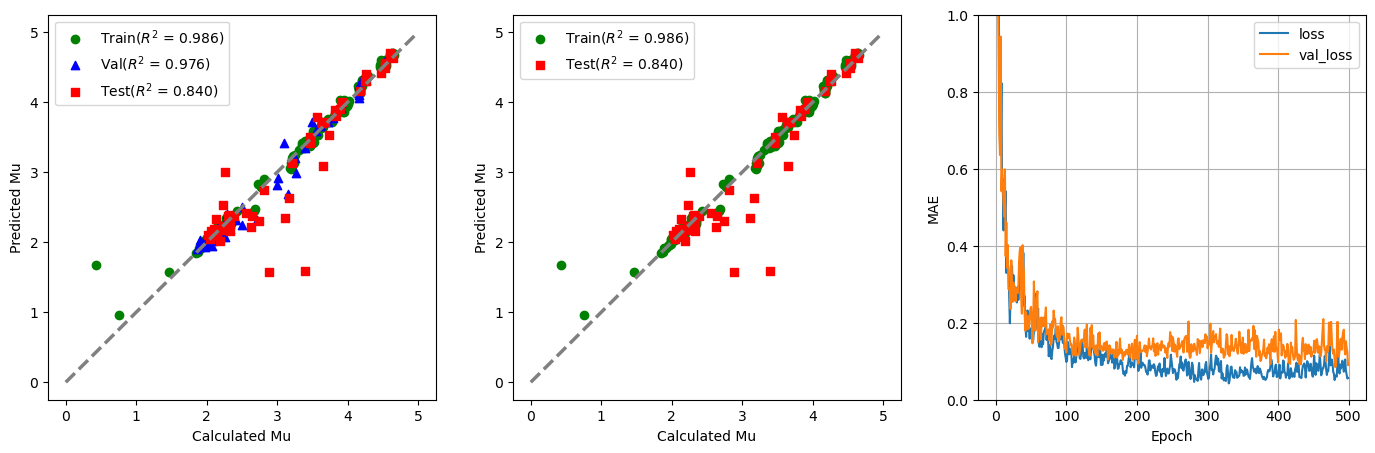

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [213]:
detailed_objective_47(study_0.best_trials[3])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R2 scores (train, val, test) =  0.9898847019322373 0.950637279721888 0.8610330406303451
MAE values (train, val, test) =  0.07401706658252773 0.13816281560415383 0.18925263225962385
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


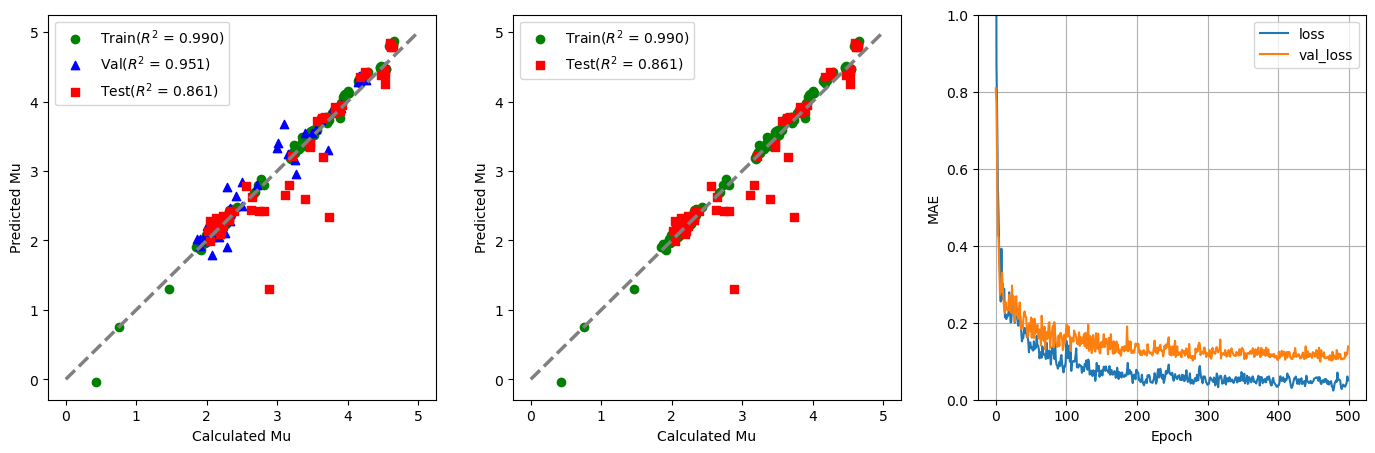

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [215]:
detailed_objective_47(study_0.best_trials[0])

In [173]:
## RS 52

In [157]:
import tensorflow as tf
import optuna
import numpy as np
from tensorflow.keras import layers, regularizers
from sklearn.metrics import r2_score
import random

train_val_dataset = df_mu_fm.sample(frac = 0.8, random_state = 52)
train_dataset = train_val_dataset.sample(frac = 0.75, random_state = 52)
val_dataset = train_val_dataset.drop(train_dataset.index)
test_dataset = df_mu_fm.drop(train_val_dataset.index)

train_data = np.copy(train_dataset)
val_data = np.copy(val_dataset)
test_data = np.copy(test_dataset)

train_data = pd.DataFrame(train_data)
val_data = pd.DataFrame(val_data)
test_data = pd.DataFrame(test_data)

X_train = train_data.drop([0],axis='columns')
X_val = val_data.drop([0],axis='columns')
X_test = test_data.drop([0],axis='columns')

y_train = train_data[0]
y_val = val_data[0]
y_test = test_data[0]

def objective_52(trial):

    hidden_layer_1  = trial.suggest_categorical('hidden_1', [100, 64])
    hidden_layer_2 = trial.suggest_categorical('hidden_2', [128, 50, 32])
    hidden_layer_3 = trial.suggest_categorical('hidden_3', [64, 20, 16])
    dropout_rate = trial.suggest_categorical('dropout_rate', [0.0, 0.1, 0.2])
    reg_type = trial.suggest_categorical('reg_type', ['None', 'L1', 'L2'])
    reg_strength = trial.suggest_categorical('reg_strength', [1e-5, 1e-4, 1e-3, 1e-2]) if reg_type != 'None' else 0.0
    learning_rate = trial.suggest_categorical('learning_rate', [1e-4, 1e-3, 5e-3, 1e-2])
    activation_type = trial.suggest_categorical('activation', ['relu', 'elu', 'selu'])

    SEED = 52
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)
    
    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(np.array(X_train))
    
    if reg_type == 'L1':
        reg = regularizers.l1(reg_strength)
    elif reg_type == 'L2':
        reg = regularizers.l2(reg_strength)
    else:
        reg = None  # No regularization  

    model = tf.keras.Sequential([normalizer])

    model.add(layers.Dense(hidden_layer_1, activation=activation_type, kernel_regularizer=reg))
    model.add(layers.Dropout(dropout_rate, seed=SEED))
    model.add(layers.Dense(hidden_layer_2, activation=activation_type, kernel_regularizer=reg))
    model.add(layers.Dropout(dropout_rate, seed=SEED))
    model.add(layers.Dense(hidden_layer_3, activation=activation_type, kernel_regularizer=reg))
    model.add(layers.Dropout(dropout_rate, seed=SEED))
    model.add(layers.Dense(1))  

    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mean_absolute_error')

    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0, shuffle=False)

    # Return best validation loss
    # return min(history.history['val_loss'])

    # Return best R2 scores
    r2_train = r2_score(y_train, model.predict(X_train).flatten())
    r2_val = r2_score(y_val, model.predict(X_val).flatten())
    r2_test = r2_score(y_test, model.predict(X_test).flatten())
    return r2_train,r2_val,r2_test

# Run Optuna optimization
#study = optuna.create_study(direction='minimize') # for minimizing loss
study_52 = optuna.create_study(directions=['maximize','maximize','maximize']) # for maximizing R2
study_52.optimize(objective_52, n_trials=100)

[I 2025-03-11 17:22:36,556] A new study created in memory with name: no-name-84b86497-8c79-4963-a73e-b5b8dc93e48d


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-03-11 17:23:21,612] Trial 0 finished with values: [0.8813310465513216, 0.8229434239227128, 0.9512217506142023] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 17:24:06,719] Trial 1 finished with values: [0.8388803175381547, 0.8132801782478045, 0.8993402763502005] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 17:24:51,263] Trial 2 finished with values: [0.8788281546890623, 0.8490214962342608, 0.9492144251072442] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[I 2025-03-11 17:25:36,591] Trial 3 finished with values: [0.8483844596737655, 0.8361366687221062, 0.9420577209877626] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2025-03-11 17:26:21,225] Trial 4 finished with values: [0.8437609588886545, 0.7662885485348208, 0.9198387082178222] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 17:27:05,933] Trial 5 finished with values: [0.8468231175497246, 0.740317370646681, 0.8236848344896297] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-03-11 17:27:50,511] Trial 6 finished with values: [0.8654590381409779, 0.8073816944034267, 0.916789264564333] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 17:28:35,337] Trial 7 finished with values: [0.8878278503446857, 0.8682966152873653, 0.9554241357629356] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-11 17:29:20,825] Trial 8 finished with values: [0.8785715346392723, 0.847004922407699, 0.9462739440220811] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-11 17:30:05,689] Trial 9 finished with values: [0.8273008270032753, 0.8144944526060025, 0.918776401488418] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 17:30:49,721] Trial 10 finished with values: [0.9681662734838564, 0.8410136879422565, 0.887152841743045] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-11 17:31:36,321] Trial 11 finished with values: [0.7068838984397485, 0.5925162706226677, 0.6971582081539776] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 17:32:21,293] Trial 12 finished with values: [0.9172178912887579, 0.8780862818329207, 0.9595127539210738] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-11 17:33:05,615] Trial 13 finished with values: [0.9284781628019783, 0.7800174049884752, 0.8826730690816756] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-11 17:33:51,031] Trial 14 finished with values: [0.897973314235854, 0.8671599474597179, 0.9484350665237519] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-11 17:34:36,187] Trial 15 finished with values: [0.8774250376011838, 0.8341079007924429, 0.9389969614341293] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 17:35:20,865] Trial 16 finished with values: [0.8573803385641839, 0.8434893446161231, 0.9366779071050965] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-11 17:36:06,886] Trial 17 finished with values: [0.8545313345136376, 0.8171487734108374, 0.9089844538900794] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 17:36:52,508] Trial 18 finished with values: [0.8052681453555461, 0.7268682486184825, 0.8260773548268618] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 17:37:37,343] Trial 19 finished with values: [0.8518769035255314, 0.8078127210602111, 0.9026927655481876] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-11 17:38:23,104] Trial 20 finished with values: [0.7436141947797198, 0.7473741726271145, 0.8521737105629144] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 17:39:07,870] Trial 21 finished with values: [0.8671535077414765, 0.7503847939753536, 0.8636063630587328] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 17:39:52,686] Trial 22 finished with values: [0.9099346128040067, 0.82788279934717, 0.9443622928725666] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 17:40:37,634] Trial 23 finished with values: [0.9007057490002932, 0.8742499226120285, 0.9593340286488191] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-11 17:41:21,800] Trial 24 finished with values: [0.883435386377944, 0.8451467217985498, 0.9569207153256456] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 17:42:06,894] Trial 25 finished with values: [0.8945807128857153, 0.8876909743429507, 0.9538831762973047] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 17:42:52,223] Trial 26 finished with values: [0.8582185237535457, 0.804756930492339, 0.9121446230908022] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-11 17:43:38,178] Trial 27 finished with values: [0.8865329723805596, 0.852790131219265, 0.9509361157111318] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 17:44:22,645] Trial 28 finished with values: [0.981003898025573, 0.8713948196652638, 0.9451404675793494] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-11 17:45:07,387] Trial 29 finished with values: [0.8670240519608536, 0.7934800983593993, 0.9122319208570094] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 17:45:52,061] Trial 30 finished with values: [0.85932553975427, 0.853573458571488, 0.9447516650640132] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 17:46:37,606] Trial 31 finished with values: [0.8439174131102795, 0.729237236241379, 0.8309055266447309] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-11 17:47:23,163] Trial 32 finished with values: [0.8837628875214072, 0.8334636547268632, 0.9510460980513022] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 17:48:08,528] Trial 33 finished with values: [0.8688484168184107, 0.8533654978913512, 0.9491129134693702] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 17:48:55,438] Trial 34 finished with values: [0.9665933019652407, 0.8433041916541075, 0.9562388044204513] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 17:49:43,683] Trial 35 finished with values: [0.8651101747585861, 0.8047682128440249, 0.9086030208835925] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 17:50:29,950] Trial 36 finished with values: [0.9799160816318297, 0.8307020863959538, 0.9417479210424495] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[I 2025-03-11 17:51:16,599] Trial 37 finished with values: [0.8960088534943881, 0.8870212398187012, 0.9517272362325339] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 17:52:03,867] Trial 38 finished with values: [0.9133248112378277, 0.8151565671892234, 0.9005995987206803] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 17:52:50,243] Trial 39 finished with values: [0.9646019128345377, 0.8259976385407489, 0.9688536109667892] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 17:53:36,253] Trial 40 finished with values: [0.926047258102586, 0.8604741919840894, 0.9634822881388564] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


[I 2025-03-11 17:54:22,037] Trial 41 finished with values: [0.9013211351173149, 0.8774930895132833, 0.9678297558531154] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2025-03-11 17:55:06,947] Trial 42 finished with values: [0.8211343653925074, 0.8000564485245412, 0.8884531730743046] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 17:55:51,815] Trial 43 finished with values: [0.8178051129666069, 0.7955337903675851, 0.8835335108958964] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[I 2025-03-11 17:57:17,096] Trial 44 finished with values: [0.8928332404274351, 0.8808087705058897, 0.9653796490331868] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-11 17:58:02,927] Trial 45 finished with values: [0.9692730174242197, 0.7723776076510316, 0.9144384293301773] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2025-03-11 17:58:49,474] Trial 46 finished with values: [0.871379031441222, 0.8321142077010019, 0.9427321367066374] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-11 17:59:35,547] Trial 47 finished with values: [0.9820434897003366, 0.8138839061867706, 0.9654747506031707] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-03-11 18:00:21,966] Trial 48 finished with values: [0.8676805763511682, 0.8635616355971099, 0.931648607526883] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-03-11 18:01:08,269] Trial 49 finished with values: [0.8396471634421059, 0.7665638065671538, 0.9223911298290969] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-11 18:01:53,761] Trial 50 finished with values: [0.9749998030516741, 0.8447483605022101, 0.9577381326163773] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


[I 2025-03-11 18:02:39,284] Trial 51 finished with values: [0.9862059022461198, 0.8337070295392818, 0.9681611023643851] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 18:03:24,965] Trial 52 finished with values: [0.9845087732207655, 0.8220642755056917, 0.9633327112292194] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-11 18:04:10,325] Trial 53 finished with values: [0.8810119960024264, 0.8702166178225327, 0.9628113069603852] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 18:04:56,300] Trial 54 finished with values: [0.8644784762235267, 0.8573799031519587, 0.9463952591629845] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 18:05:42,572] Trial 55 finished with values: [0.9044603375056994, 0.8243739215525245, 0.9345809900770137] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-11 18:06:28,113] Trial 56 finished with values: [0.9029778409789023, 0.8682315734930138, 0.9578845523206457] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 18:07:14,025] Trial 57 finished with values: [0.8554282594139069, 0.8422043132300058, 0.9481743713813647] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


[I 2025-03-11 18:08:00,076] Trial 58 finished with values: [0.8437609588886545, 0.7662885485348208, 0.9198387082178222] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 18:08:46,132] Trial 59 finished with values: [0.9135296145033031, 0.8604352329120322, 0.94696208861828] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2025-03-11 18:09:32,686] Trial 60 finished with values: [0.8835679810110766, 0.8689137917801094, 0.9595122579914124] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


[I 2025-03-11 18:10:18,269] Trial 61 finished with values: [0.884913223970448, 0.8689425128422823, 0.9421894114545832] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 18:11:04,131] Trial 62 finished with values: [0.8459211574570005, 0.7942437890635078, 0.9049259596458399] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 18:11:49,995] Trial 63 finished with values: [0.8921101371261357, 0.8673271121157583, 0.9567861631668413] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-11 18:12:35,862] Trial 64 finished with values: [0.9660251532036026, 0.7656777915211042, 0.9616508973204834] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


[I 2025-03-11 18:13:21,678] Trial 65 finished with values: [0.8437609588886545, 0.7662885485348208, 0.9198387082178222] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 18:14:06,743] Trial 66 finished with values: [0.9117543851205223, 0.8894993705568044, 0.9640870093513128] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


[I 2025-03-11 18:14:52,192] Trial 67 finished with values: [0.8559068872501502, 0.8392903055434712, 0.9453702621103303] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 18:15:37,080] Trial 68 finished with values: [0.8605110103332666, 0.8536754755803322, 0.9422409905172673] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2025-03-11 18:16:22,700] Trial 69 finished with values: [0.8816911740864746, 0.8479544017101812, 0.938794491334847] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-11 18:17:08,184] Trial 70 finished with values: [0.8671535077414765, 0.7503847939753536, 0.8636063630587328] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 18:17:53,713] Trial 71 finished with values: [0.9783329971370871, 0.8517325981145298, 0.9694382499109734] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 18:18:38,906] Trial 72 finished with values: [0.889295367832561, 0.77814966411636, 0.9399213620778677] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2025-03-11 18:19:24,385] Trial 73 finished with values: [0.8965913080008076, 0.8779796300646124, 0.952269690780058] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 18:20:09,264] Trial 74 finished with values: [0.8810119960024264, 0.8702166178225327, 0.9628113069603852] and parameters: {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 18:20:54,330] Trial 75 finished with values: [0.9117543851205223, 0.8894993705568044, 0.9640870093513128] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 18:21:39,488] Trial 76 finished with values: [0.893847676145468, 0.8490641534442565, 0.9658219690215283] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


[I 2025-03-11 18:22:25,017] Trial 77 finished with values: [0.9194667551955603, 0.8454305118499355, 0.9558120035130241] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 18:23:10,261] Trial 78 finished with values: [0.9133248112378277, 0.8151565671892234, 0.9005995987206803] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2025-03-11 18:23:55,146] Trial 79 finished with values: [0.8765437158429744, 0.8316559599400557, 0.9020705672293429] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 18:24:40,102] Trial 80 finished with values: [0.9212633299926818, 0.6725338495417753, 0.7215012280286756] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 18:25:27,012] Trial 81 finished with values: [0.8562513271525825, 0.8658955871511838, 0.9370701273129026] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 18:26:13,146] Trial 82 finished with values: [0.9203766141290209, 0.6343679828946966, 0.804303399940066] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-11 18:26:58,631] Trial 83 finished with values: [0.8854985265413645, 0.8557481444118977, 0.9548340539980064] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


[I 2025-03-11 18:27:43,328] Trial 84 finished with values: [0.8579388750676907, 0.8458995906422077, 0.9633625556032349] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2025-03-11 18:28:27,754] Trial 85 finished with values: [0.9786326209409019, 0.8801317437680798, 0.9591925788623148] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 18:29:13,439] Trial 86 finished with values: [0.8846898915427371, 0.8481488765033679, 0.9676021945303371] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 18:29:58,815] Trial 87 finished with values: [0.84432825386186, 0.7752995707312702, 0.9114739251310686] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.0001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 18:30:44,125] Trial 88 finished with values: [0.8557119517569176, 0.8513822927303847, 0.938388471140649] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 18:31:30,016] Trial 89 finished with values: [0.8760544038573728, 0.8178501636249539, 0.9521210804401004] and parameters: {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.001, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2025-03-11 18:32:15,371] Trial 90 finished with values: [0.8775281337541241, 0.8306457561465359, 0.9488613468688503] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.2, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'relu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 18:33:00,192] Trial 91 finished with values: [0.8948993185599734, 0.8739555754145364, 0.9510492031510563] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.001, 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2025-03-11 18:33:46,194] Trial 92 finished with values: [0.845144494526439, 0.8187556907136647, 0.9294709780901512] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.2, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.01, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2025-03-11 18:34:31,142] Trial 93 finished with values: [0.9803266960848427, 0.8560911684238377, 0.9538937507643668] and parameters: {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2025-03-11 18:35:18,446] Trial 94 finished with values: [0.8921558999188804, 0.8504744794263056, 0.958885431544426] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


[I 2025-03-11 18:36:05,245] Trial 95 finished with values: [0.8862966903317994, 0.847090513741324, 0.9609283773554778] and parameters: {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.001, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[I 2025-03-11 18:36:50,739] Trial 96 finished with values: [0.9779549067065401, 0.7600681535377983, 0.9668528146907922] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2025-03-11 18:37:36,721] Trial 97 finished with values: [0.8907012552634483, 0.871521904587548, 0.9559483975339331] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.2, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2025-03-11 18:38:22,858] Trial 98 finished with values: [0.8558509553446656, 0.8268048067526558, 0.9347087195861589] and parameters: {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.1, 'reg_type': 'L2', 'reg_strength': 0.01, 'learning_rate': 0.005, 'activation': 'elu'}.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2025-03-11 18:39:08,239] Trial 99 finished with values: [0.8843593024710987, 0.8351309804965664, 0.9519103376960338] and parameters: {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.001, 'activation': 'selu'}.


In [180]:
best_models_52 = study_52.best_trials

In [181]:
best_models_52 = study_52.best_trials
#PRINT('Trial number',
for i in range(len(best_models_52)):
    print('Model No:',i,'\n=======', '\nTrial No:',best_models_52[i].number, '\nTrain R2:',best_models_52[i].values[0],'\nValid R2:',best_models_52[i].values[1],
         '\nTest  R2:',best_models_52[i].values[2],'\nParams  :',best_models_52[i].params,'\n=======')

Model No: 0 
Trial No: 12 
Train R2: 0.9172178912887579 
Valid R2: 0.8780862818329207 
Test  R2: 0.9595127539210738 
Params  : {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'} 
Model No: 1 
Trial No: 28 
Train R2: 0.981003898025573 
Valid R2: 0.8713948196652638 
Test  R2: 0.9451404675793494 
Params  : {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'} 
Model No: 2 
Trial No: 40 
Train R2: 0.926047258102586 
Valid R2: 0.8604741919840894 
Test  R2: 0.9634822881388564 
Params  : {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'} 
Model No: 3 
Trial No: 41 
Train R2: 0.9013211351173149 
Valid R2: 0.8774930895132833 
Test  R2: 0.9678297558531154 
Params  : {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate

In [ ]:
# Model No: 0 
# ======= 
# Trial No: 12 
# Train R2: 0.9172178912887579 
# Valid R2: 0.8780862818329207 
# Test  R2: 0.9595127539210738 
# Params  : {'hidden_1': 100, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'} 
# =======
# Model No: 1 
# ======= 
# Trial No: 28 
# Train R2: 0.981003898025573 
# Valid R2: 0.8713948196652638 
# Test  R2: 0.9451404675793494 
# Params  : {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.01, 'activation': 'selu'} 
# =======
# Model No: 2 
# ======= 
# Trial No: 40 
# Train R2: 0.926047258102586 
# Valid R2: 0.8604741919840894 
# Test  R2: 0.9634822881388564 
# Params  : {'hidden_1': 64, 'hidden_2': 128, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'} 
# =======
# Model No: 3 
# ======= 
# Trial No: 41 
# Train R2: 0.9013211351173149 
# Valid R2: 0.8774930895132833 
# Test  R2: 0.9678297558531154 
# Params  : {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 64, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 0.0001, 'learning_rate': 0.005, 'activation': 'relu'} 
# =======
# Model No: 4 
# ======= 
# Trial No: 44 
# Train R2: 0.8928332404274351 
# Valid R2: 0.8808087705058897 
# Test  R2: 0.9653796490331868 
# Params  : {'hidden_1': 100, 'hidden_2': 32, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'} 
# =======
# Model No: 5 
# ======= 
# Trial No: 51 
# Train R2: 0.9862059022461198 
# Valid R2: 0.8337070295392818 
# Test  R2: 0.9681611023643851 
# Params  : {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.005, 'activation': 'elu'} 
# =======
# Model No: 6 
# ======= 
# Trial No: 66 
# Train R2: 0.9117543851205223 
# Valid R2: 0.8894993705568044 
# Test  R2: 0.9640870093513128 
# Params  : {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'} 
# =======
# Model No: 7 
# ======= 
# Trial No: 71 
# Train R2: 0.9783329971370871 
# Valid R2: 0.8517325981145298 
# Test  R2: 0.9694382499109734 
# Params  : {'hidden_1': 100, 'hidden_2': 128, 'hidden_3': 20, 'dropout_rate': 0.0, 'reg_type': 'L2', 'reg_strength': 1e-05, 'learning_rate': 0.001, 'activation': 'elu'} 
# =======
# Model No: 8 
# ======= 
# Trial No: 75 
# Train R2: 0.9117543851205223 
# Valid R2: 0.8894993705568044 
# Test  R2: 0.9640870093513128 
# Params  : {'hidden_1': 64, 'hidden_2': 50, 'hidden_3': 20, 'dropout_rate': 0.1, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'elu'} 
# =======
# Model No: 9 
# ======= 
# Trial No: 85 
# Train R2: 0.9786326209409019 
# Valid R2: 0.8801317437680798 
# Test  R2: 0.9591925788623148 
# Params  : {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'L1', 'reg_strength': 1e-05, 'learning_rate': 0.01, 'activation': 'selu'} 
# =======
# Model No: 10 
# ======= 
# Trial No: 93 
# Train R2: 0.9803266960848427 
# Valid R2: 0.8560911684238377 
# Test  R2: 0.9538937507643668 
# Params  : {'hidden_1': 64, 'hidden_2': 32, 'hidden_3': 16, 'dropout_rate': 0.0, 'reg_type': 'None', 'learning_rate': 0.005, 'activation': 'selu'} 
# =======

In [184]:
best_models_optuna_pd_52 = pd.DataFrame({'Trial number': [best_models_52[i].number for i in range(len(best_models_52))],
                                             'Train R2': [best_models_52[i].values[0] for i in range(len(best_models_52))],
                                             'Test R2': [best_models_52[i].values[2] for i in range(len(best_models_52))],
                                             'CV R2': [best_models_52[i].values[1] for i in range(len(best_models_52))],
                                             'hidden_layer_1': [best_models_52[i].params['hidden_1'] for i in range(len(best_models_52))],
                                             'hidden_layer_2': [best_models_52[i].params['hidden_2'] for i in range(len(best_models_52))],
                                             'hidden_layer_3': [best_models_52[i].params['hidden_3'] for i in range(len(best_models_52))],
                                             'learning_rate': [best_models_52[i].params['learning_rate'] for i in range(len(best_models_52))],
                                             'dropout_rate': [best_models_52[i].params['dropout_rate'] for i in range(len(best_models_52))],
                                             'reg_strength': [best_models_52[i].params['reg_strength'] if best_models_52[i].params['reg_type'] != 'None' else 0.0 for i in range(len(best_models_52))],
                                             'activation_type': [best_models_52[i].params['activation'] for i in range(len(best_models_52))]
                                            })
best_models_optuna_pd_52.to_excel('Results_Mu/FFNN_HP_Optuna_52.xlsx')

In [199]:
## Best trials

def detailed_objective_52(trial):

    hidden_layer_1  = trial.suggest_categorical('hidden_1', [100, 64])
    hidden_layer_2 = trial.suggest_categorical('hidden_2', [128, 50, 32])
    hidden_layer_3 = trial.suggest_categorical('hidden_3', [64, 20, 16])
    dropout_rate = trial.suggest_categorical('dropout_rate', [0.0, 0.1, 0.2])
    reg_type = trial.suggest_categorical('reg_type', ['None', 'L1', 'L2'])
    reg_strength = trial.suggest_categorical('reg_strength', [1e-5, 1e-4, 1e-3, 1e-2]) if reg_type != 'None' else 0.0
    learning_rate = trial.suggest_categorical('learning_rate', [1e-4, 1e-3, 5e-3, 1e-2])
    activation_type = trial.suggest_categorical('activation', ['relu', 'elu', 'selu'])

    SEED = 52
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)
    
    normalizer = tf.keras.layers.Normalization(axis=-1)
    normalizer.adapt(np.array(X_train))
    
    if reg_type == 'L1':
        reg = regularizers.l1(best_models_52[10].params['reg_strength'])
    elif reg_type == 'L2':
        reg = regularizers.l2(best_models_52[10].params['reg_strength'])
    else:
        reg = None  # No regularization  

    model = tf.keras.Sequential([normalizer])

    model.add(layers.Dense(best_models_52[10].params['hidden_1'], activation=best_models_52[10].params['activation'], kernel_regularizer=reg))
    model.add(layers.Dropout(best_models_52[10].params['dropout_rate'], seed=SEED))
    model.add(layers.Dense(best_models_52[10].params['hidden_2'], activation=best_models_52[10].params['activation'], kernel_regularizer=reg))
    model.add(layers.Dropout(best_models_52[10].params['dropout_rate'], seed=SEED))
    model.add(layers.Dense(best_models_52[10].params['hidden_3'], activation=best_models_52[10].params['activation'], kernel_regularizer=reg))
    model.add(layers.Dropout(best_models_52[10].params['dropout_rate'], seed=SEED))
    model.add(layers.Dense(1))  

    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(best_models_52[10].params['learning_rate']), loss='mean_absolute_error')

    # Train model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500, verbose=0, shuffle=False)

    # Return best validation loss
    # return min(history.history['val_loss'])

    # Return best R2 scores
    r2_train = r2_score(y_train, model.predict(X_train).flatten())
    r2_val = r2_score(y_val, model.predict(X_val).flatten())
    r2_test = r2_score(y_test, model.predict(X_test).flatten())

    # Return best MSE scores
    mae_train = mean_absolute_error(y_train, model.predict(X_train).flatten())
    mae_val = mean_absolute_error(y_val, model.predict(X_val).flatten())
    mae_test = mean_absolute_error(y_test, model.predict(X_test).flatten())

    print('R2 scores (train, val, test) = ', r2_train,r2_val,r2_test)
    print('MAE values (train, val, test) = ', mae_train,mae_val,mae_test)

    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(17,5))
    ax1.scatter(y_train, model.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax1.scatter(y_val, model.predict(X_val).flatten(),label='Val($R^2$ = '+str(f'{r2_val:.3f}')+')',marker='^',color='blue')
    ax1.scatter(y_test, model.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax1.set_xlabel('Calculated Mu')
    ax1.set_ylabel('Predicted Mu')
    ax1.plot([0,5], [0,5],linewidth=2.5, color='gray', linestyle='dashed')
    ax1.legend()
    
    ax2.scatter(y_train, model.predict(X_train).flatten(),label='Train($R^2$ = '+str(f'{r2_train:.3f}')+')',marker='o',color='green')
    ax2.scatter(y_test, model.predict(X_test).flatten(),label='Test($R^2$ = '+str(f'{r2_test:.3f}')+')',marker='s',color='red')
    ax2.set_xlabel('Calculated Mu')
    ax2.set_ylabel('Predicted Mu')
    ax2.plot([0,5], [0,5],linewidth=2.5, color='gray', linestyle='dashed')
    ax2.legend()

    ax3.plot(history.history['loss'], label='loss')
    ax3.plot(history.history['val_loss'], label='val_loss')
    ax3.set_ylim([0, 1])
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('MAE')
    ax3.legend()
    ax3.grid(True)
        
    plt.show()

    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    y_pred_test = model.predict(X_test)
    
    X_train.to_csv('Results_Mu/optuna_X_train_52.csv',index=False)
    X_val.to_csv('Results_Mu/optuna_X_val_52.csv',index=False)
    X_test.to_csv('Results_Mu/optuna_X_test_52.csv',index=False)
    
    y_train.to_csv('Results_Mu/optuna_y_train_52.csv',index=False)
    y_val.to_csv('Results_Mu/optuna_y_val_52.csv',index=False)
    y_test.to_csv('Results_Mu/optuna_y_test_52.csv',index=False)
    
    pd.DataFrame(y_pred_train).to_csv('Results_Mu/optuna_y_pred_train_52_10.csv',index=False)
    pd.DataFrame(y_pred_val).to_csv('Results_Mu/optuna_y_pred_val_52_10.csv',index=False)
    pd.DataFrame(y_pred_test).to_csv('Results_Mu/optuna_y_pred_test_52_10.csv',index=False) 

    model.save(f'Results_Mu/optuna_model_RS_52_10.keras')
    
    with open(f'Results_Mu/optuna_model_RS_52_10.pkl', 'wb') as f:
        pickle.dump(history.history, f)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R2 scores (train, val, test) =  0.9803266960848427 0.8560911684238377 0.9538937507643668
MAE values (train, val, test) =  0.0723412614538785 0.15300054050258505 0.1258129784068833
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


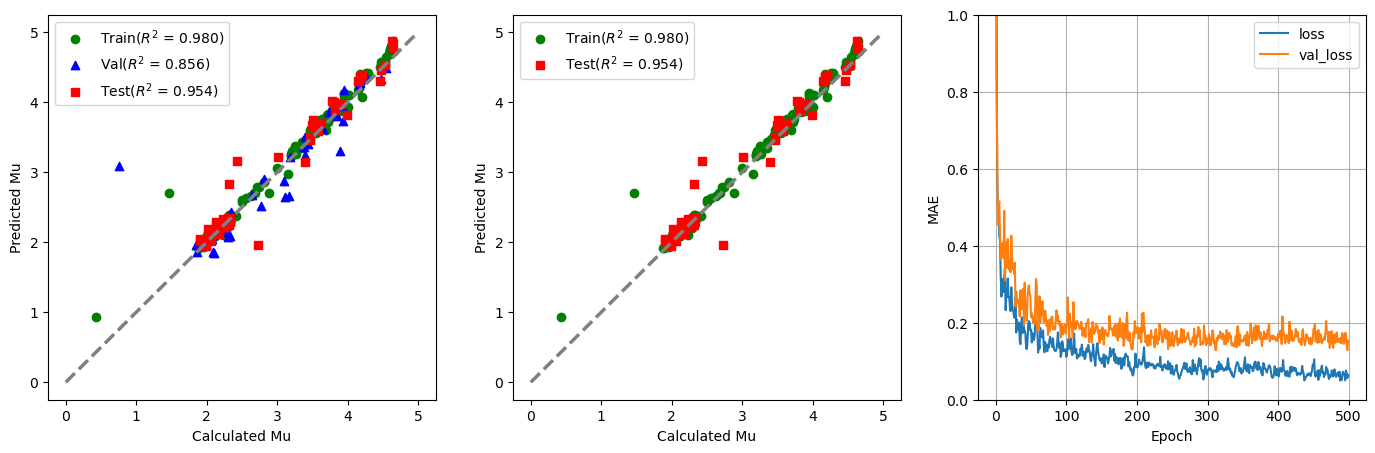

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [200]:
detailed_objective_52(study_52.best_trials[10])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
R2 scores (train, val, test) =  0.9786326209409019 0.8801317437680798 0.9591925788623148
MAE values (train, val, test) =  0.06204486009723185 0.13601639768344717 0.1041036720440397
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


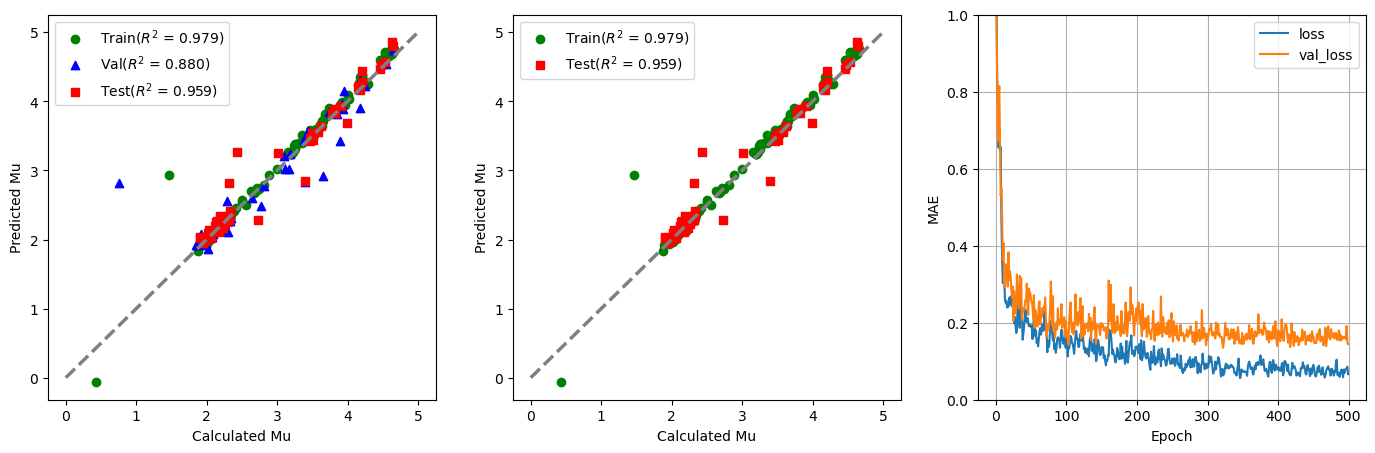

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [198]:
detailed_objective_52(study_52.best_trials[9])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
R2 scores (train, val, test) =  0.9783329971370871 0.8517325981145298 0.9694382499109734
MAE values (train, val, test) =  0.0499225473512199 0.1727135875776079 0.10416404106824736
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


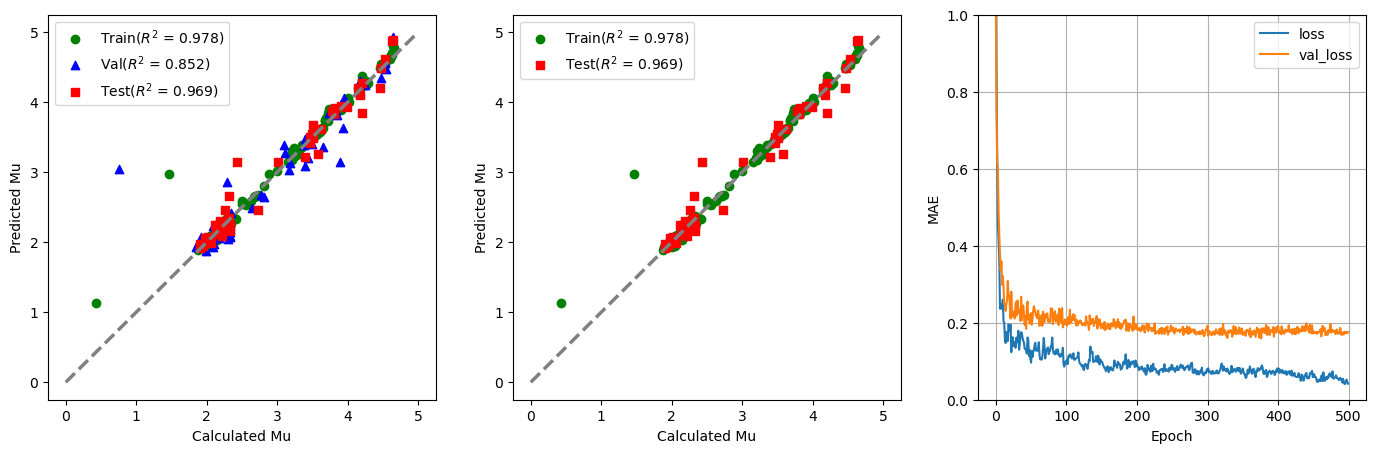

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [196]:
detailed_objective_52(study_52.best_trials[7])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
R2 scores (train, val, test) =  0.9862059022461198 0.8337070295392818 0.9681611023643851
MAE values (train, val, test) =  0.03214817006936351 0.16278235979222794 0.09354878187748904
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


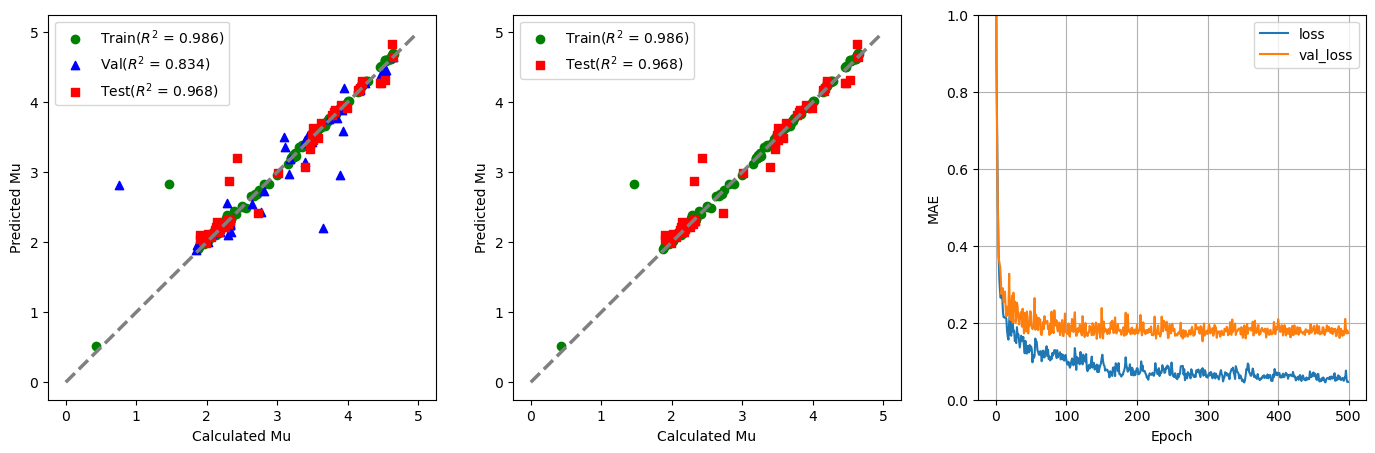

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [194]:
detailed_objective_52(study_52.best_trials[5])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
R2 scores (train, val, test) =  0.981003898025573 0.8713948196652638 0.9451404675793494
MAE values (train, val, test) =  0.07154363377766174 0.16619875996566594 0.13171864712895912
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


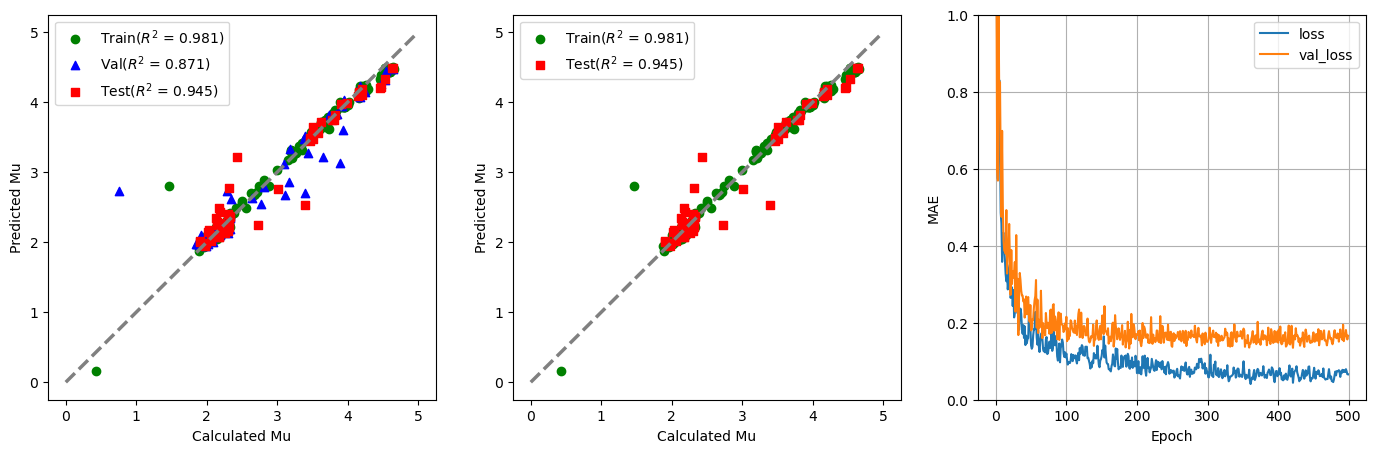

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [192]:
detailed_objective_52(study_52.best_trials[1])

In [1]:
## predicting 785 candidates using 52_10 best model

In [16]:
df_100_features = df_mu.drop(['Mu_per_cell'],axis=1)

In [5]:
X_train_mu = pd.read_csv('Results_Mu/optuna_X_train_52.csv')
X_val_mu = pd.read_csv('Results_Mu/optuna_X_val_52.csv')
X_test_mu = pd.read_csv('Results_Mu/optuna_X_test_52.csv')

y_train_mu = pd.read_csv('Results_Mu/optuna_y_train_52.csv')
y_val_mu = pd.read_csv('Results_Mu/optuna_y_val_52.csv')
y_test_mu = pd.read_csv('Results_Mu/optuna_y_test_52.csv')

In [18]:
from keras.layers import TFSMLayer

In [20]:
loaded_best_model = load_model("Results_Mu/optuna_model_RS_52_10.keras")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R2 scores (train, val, test) =  0.9803267121315002 0.8560912013053894 0.953893780708313
MAE values (train, val, test) =  0.0723412614538785 0.15300054050258505 0.1258129784068833
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


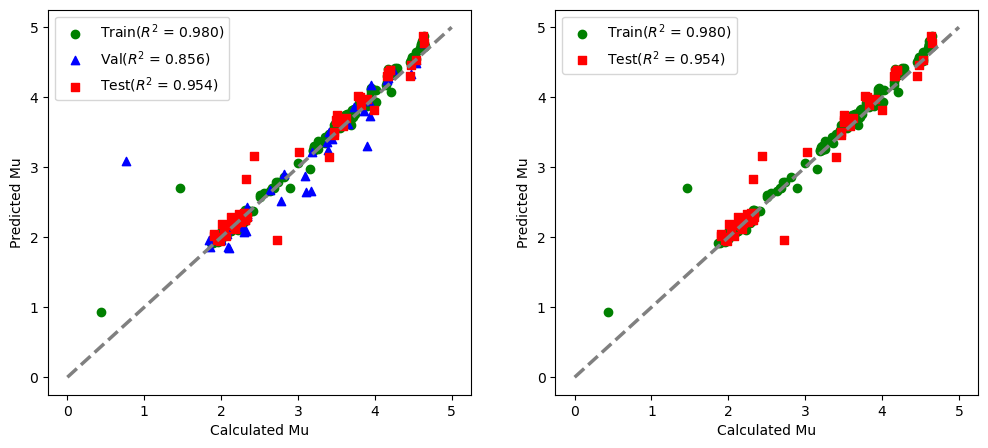

In [22]:
# Return best R2 scores
r2_train_loaded = r2_score(y_train_mu, loaded_best_model.predict(X_train_mu).flatten())
r2_val_loaded = r2_score(y_val_mu, loaded_best_model.predict(X_val_mu).flatten())
r2_test_loaded = r2_score(y_test_mu, loaded_best_model.predict(X_test_mu).flatten())
# Return best MSE scores
mae_train_loaded = mean_absolute_error(y_train_mu, loaded_best_model.predict(X_train_mu).flatten())
mae_val_loaded = mean_absolute_error(y_val_mu, loaded_best_model.predict(X_val_mu).flatten())
mae_test_loaded = mean_absolute_error(y_test_mu, loaded_best_model.predict(X_test_mu).flatten())
print('R2 scores (train, val, test) = ', r2_train_loaded,r2_val_loaded,r2_test_loaded)
print('MAE values (train, val, test) = ', mae_train_loaded,mae_val_loaded,mae_test_loaded)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.scatter(y_train_mu, loaded_best_model.predict(X_train_mu).flatten(),label='Train($R^2$ = '+str(f'{r2_train_loaded:.3f}')+')',marker='o',color='green')
ax1.scatter(y_val_mu, loaded_best_model.predict(X_val_mu).flatten(),label='Val($R^2$ = '+str(f'{r2_val_loaded:.3f}')+')',marker='^',color='blue')
ax1.scatter(y_test_mu, loaded_best_model.predict(X_test_mu).flatten(),label='Test($R^2$ = '+str(f'{r2_test_loaded:.3f}')+')',marker='s',color='red')
ax1.set_xlabel('Calculated Mu')
ax1.set_ylabel('Predicted Mu')
ax1.plot([0,5], [0,5],linewidth=2.5, color='gray', linestyle='dashed')
ax1.legend()

ax2.scatter(y_train_mu, loaded_best_model.predict(X_train_mu).flatten(),label='Train($R^2$ = '+str(f'{r2_train_loaded:.3f}')+')',marker='o',color='green')
ax2.scatter(y_test_mu, loaded_best_model.predict(X_test_mu).flatten(),label='Test($R^2$ = '+str(f'{r2_test_loaded:.3f}')+')',marker='s',color='red')
ax2.set_xlabel('Calculated Mu')
ax2.set_ylabel('Predicted Mu')
ax2.plot([0,5], [0,5],linewidth=2.5, color='gray', linestyle='dashed')
ax2.legend()
plt.show()

In [23]:
candidates_785 = pd.read_excel('Results_Mu/descriptors_for_891_candidates.xlsx','without_Si')

In [27]:
X_785 = candidates_785[df_100_features.columns]

In [29]:
X_785.columns = range(1,101)

In [34]:
pred_y_785 = loaded_best_model.predict(X_785)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [35]:
pd.DataFrame(pred_y_785).to_csv('Results_Mu/FFNN_Mu_pred_785.csv',index=False)